# **Solar Farm Insight**

Exploratory Data Analysis (`EDA`) for MoonLight Energy Solutions to identify optimal locations for solar farm installations, focusing on sustainability and operational efficiency through data-driven insights.

### **Install Dependencies**

In [ ]:
!pip3 install -r ../requirements/local.txt -qqq

### **Import Libraries**

In [ ]:
import pathlib
import sys
import warnings

import pandas as pd
from IPython.display import display
from scipy.stats import ttest_ind

sys.path.append("..")

from notebooks.utils import (
    analyze_rh_impact,
    calculate_z_scores,
    plot_boxplot_rh_categories,
    plot_bubble_chart,
    plot_cleaning_impact,
    plot_correlation_heatmap,
    plot_entries,
    plot_histogram_with_percentiles,
    plot_histograms,
    plot_scatter_matrix,
    plot_seasonal_decomposition,
    plot_statistical_summary,
    plot_trends,
    plot_windrose_distribution,
    report_null_columns,
)
from scripts.setup_data import extract_data

warnings.filterwarnings("ignore")

## **Dataset Overview**

### **Solar Radiation Measurement Data**
The data for this week's challenge is extracted and aggregated from Solar Radiation Measurement Data. Each row in the data contains the values for solar radiation, air temperature, relative humidity, barometric pressure, precipitation, wind speed, and wind direction, cleaned and soiled radiance sensor (soiling measurement) and cleaning events.

The structure of the data is as follows
- **`Timestamp (yyyy-mm-dd hh:mm)`**: Date and time of each observation.
- **`GHI (W/m²)`**: Global Horizontal Irradiance, the total solar radiation received per square meter on a horizontal surface.
- **`DNI (W/m²)`**: Direct Normal Irradiance, the amount of solar radiation received per square meter on a surface perpendicular to the rays of the sun.
- **`DHI (W/m²)`**: Diffuse Horizontal Irradiance, solar radiation received per square meter on a horizontal surface that does not arrive on a direct path from the sun.
- **`ModA (W/m²)`**: Measurements from a module or sensor (A), similar to irradiance.
- **`ModB (W/m²)`**: Measurements from a module or sensor (B), similar to irradiance.
- **`Tamb (°C)`**: Ambient Temperature in degrees Celsius.
- **`RH (%)`**: Relative Humidity as a percentage of moisture in the air.
- **`WS (m/s)`**: Wind Speed in meters per second.
- **`WSgust (m/s)`**: Maximum Wind Gust Speed in meters per second.
- **`WSstdev (m/s)`**: Standard Deviation of Wind Speed, indicating variability.
- **`WD (°N (to east))`**: Wind Direction in degrees from north.
- **`WDstdev`**: Standard Deviation of Wind Direction, showing directional variability.
- **`BP (hPa)`**: Barometric Pressure in hectopascals.
- **`Cleaning (1 or 0)`**: Signifying whether cleaning (possibly of the modules or sensors) occurred.
- **`Precipitation (mm/min)`**: Precipitation rate measured in millimeters per minute.
- **`TModA (°C)`**: Temperature of Module A in degrees Celsius.
- **`TModB (°C)`**: Temperature of Module B in degrees Celsius.
- **`Comments`**: This column is designed for any additional notes.

In [2]:
# Dataset path
RAW_DATASET_PATH = pathlib.Path("../data/data.zip")
EXTRACTION_OUTPUT_PATH = RAW_DATASET_PATH.parent.parent

DATASET_PATH = RAW_DATASET_PATH.parent

### **Extract dataset**

In [ ]:
# Extract the data
extract_data(RAW_DATASET_PATH, EXTRACTION_OUTPUT_PATH)

# Verify intallation
print(*list((EXTRACTION_OUTPUT_PATH / "data").glob("*.csv")), sep="\n")

### **Load the dataset**

In [3]:
# Load Benin data
bn_df = pd.read_csv(
    DATASET_PATH / "benin-malanville.csv",
    parse_dates=["Timestamp"],
    index_col="Timestamp",
)

# Load Sierraleone data
sl_df = pd.read_csv(
    DATASET_PATH / "sierraleone-bumbuna.csv",
    parse_dates=["Timestamp"],
    index_col="Timestamp",
)

# Load Togo data
tg_df = pd.read_csv(
    DATASET_PATH / "togo-dapaong_qc.csv",
    parse_dates=["Timestamp"],
    index_col="Timestamp",
)

In [4]:
display(
    "Benin Malaniville Data",
    bn_df.shape,
    bn_df.head(),
    "Sierra Leone Bumbuna Data",
    sl_df.shape,
    sl_df.head(),
    "Togo Dapaong Data",
    sl_df.shape,
    tg_df.head(),
)

'Benin Malaniville Data'

(525600, 18)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-08-09 00:01:00      0.1  122.1      0.0  998         0            0.0   
2021-08-09 00:02:00      0.0    0.0      0.0  998         0            0.0   
2021-08-09 00:03:00      0.5  124.6      1.5  997         0            0.0   
2021-08-09 00:04:00      0.4  120.3      1.3  997         0            0.0   
2021-08-09 00:05:00      0.3  113.2      1.0  997         0            0.0   

                     TModA  TModB  Comments  
Timestamp                                    
2021-08-09 00:01:00   26.3   26.2       NaN  
2021-08-09 00:02:00   26.3   26.2       NaN  
2021-08-09 00:03:00   26.4   26.2       NaN  
2021-08-09 00:04:00   26.4   26.3       NaN  
2021-08-09 00:05:00   26.4   26.3       NaN

'Sierra Leone Bumbuna Data'

(525600, 18)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

                     WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  \
Timestamp                                                                   
2021-10-30 00:01:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:02:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:03:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:04:00      0.0  0.0      0.0  1002         0            0.1   
2021-10-30 00:05:00      0.0  0.0      0.0  1002         0            0.0   

                     TModA  TModB  Comments  
Timestamp                                    
2021-10-30 00:01:00   22.3   22.6       NaN  
2021-10-30 00:02:00   22.3   22.6       NaN  
2021-10-30 00:03:00   22.3   22.6       NaN  
2021-10-30 00:04:00   22.3   22.6       NaN  
2021-10-30 00:05:00   22.3   22.6       NaN

'Togo Dapaong Data'

(525600, 18)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-10-25 00:01:00      0.4  227.6      1.1  977         0            0.0   
2021-10-25 00:02:00      0.4  229.3      0.7  977         0            0.0   
2021-10-25 00:03:00      0.3  228.5      2.9  977         0            0.0   
2021-10-25 00:04:00      0.3  229.1      4.6  977         0            0.0   
2021-10-25 00:05:00      0.4  227.5      1.6  977         0            0.0   

                     TModA  TModB  Comments  
Timestamp                                    
2021-10-25 00:01:00   24.7   24.4       NaN  
2021-10-25 00:02:00   24.7   24.4       NaN  
2021-10-25 00:03:00   24.7   24.4       NaN  
2021-10-25 00:04:00   24.7   24.4       NaN  
2021-10-25 00:05:00   24.7   24.4       NaN

## **Exploratory Data Analysis (`EDA`)**

I perform Exploratory Data Analysis (EDA) analysis to understand the dataset and identify patterns, trends, and relationships between variables.

### **Summary Statistics**

**Central Tendency and Distribution** The mean and median values for most variables, such as temperature (`Tamb`) and relative humidity (RH), are relatively close, indicating a fairly symmetrical distribution. Solar irradiance metrics (`GHI`, `DNI`, `DHI`) show significant differences between the mean and higher percentile values (75th and max), highlighting the presence of peaks during the observation period.

**Variability and Range** High standard deviations for irradiance metrics (`GHI`, `DNI`, `DHI`) and module outputs (`ModA`, `ModB`) indicate large fluctuations, which may be due to seasonal changes, time of day, or weather conditions. Wind-related variables, including wind speed (`WS`), wind gusts (`WSgust`), and wind direction (`WD`), also show notable variability, though less pronounced compared to solar metrics. Barometric pressure (`BP`) has relatively low variability, suggesting consistent atmospheric pressure in these locations.

**Outliers and Potential Anomalies** Negative values in solar irradiance metrics (e.g., `GHI`, `DNI`, `DHI`) likely represent nighttime readings or potential sensor errors that need to be accounted for during analysis. Precipitation and cleaning metrics show very low means and counts of significant values, indicating rare occurrences. Extreme max values for wind gusts and solar parameters could signal sporadic weather events or measurement anomalies that might require further investigation.

#### **Analysis**

In [ ]:
# Understand the Timestamp organization
print(bn_df.index.min(), bn_df.index.max(), sep=" || ")
print(sl_df.index.min(), sl_df.index.max(), sep=" || ")
print(tg_df.index.min(), tg_df.index.max(), sep=" || ")

##### **Benin Solar Farm**

In [ ]:
# Describe the data
bn_df.describe(exclude=["datetime64"])

In [ ]:
plot_statistical_summary(
    dataframe=bn_df,
    resample_period="1W",
    aggregation_methods=["min", "max", "mean", "median"],
    xlabel="Time",
    ylabel="Value",
    title="Benin",
    figsize=(30, 7),
)

##### **Sierra Leone Solar Farm**

In [ ]:
# Describe the data
sl_df.describe(exclude=["datetime64"])

In [ ]:
plot_statistical_summary(
    dataframe=sl_df,
    resample_period="1W",
    aggregation_methods=["min", "max", "mean", "median"],
    xlabel="Time",
    ylabel="Value",
    title="Sierra Leone",
    figsize=(30, 7),
)

##### **Togo Solar Farm**

In [ ]:
# Describe the data
tg_df.describe(exclude=["datetime64"])

In [ ]:
plot_statistical_summary(
    dataframe=tg_df,
    resample_period="1W",
    aggregation_methods=["min", "max", "mean", "median"],
    xlabel="Time",
    ylabel="Value",
    title="Togo",
    figsize=(30, 7),
)

### **Data Quality Check**

For all three locations—Benin, Sierra Leone, and Togo—the following observations were made from the analysis:

**Missing Values:**  The 'Comments' column across all datasets is entirely null (`525,600` missing values). This variable provides no meaningful information and should be excluded from further analysis unless imputation is justified.

**Negative Values:** Negative entries were identified in solar irradiance columns (`GHI`, `DNI`, `DHI`). These values are incorrect since irradiance cannot be negative. Potential causes could include sensor calibration errors or processing anomalies. These should be replaced with zeros or handled appropriately in preprocessing.

**Outliers:**

- **Solar Irradiance (`GHI`, `DNI`, `DHI`):** Significant outliers are present, with extreme high values compared to the interquartile range (IQR). These may represent clear-sky conditions or potential sensor errors. Careful consideration is required to retain or exclude these values based on domain knowledge.

- **Sensor Readings (`ModA`, `ModB`):** Outliers are observed in the module output data, with extreme values potentially caused by environmental factors or measurement anomalies. Verification of these outliers is necessary to ensure data integrity.

- **Wind Data (WS, `WSgust`):** Outliers exist for wind speed and gust values, although the distributions are more consistent compared to solar metrics. Extreme gust readings might correspond to rare weather events or sensor spikes.

- **Zero Values:** High frequencies of zero values were found in `GHI`, `DNI`, and `DHI`, particularly in periods with no sunlight (e.g., nighttime). These values are valid and should remain in the dataset.

All distributions exhibit positive skewness, with the majority of readings clustered at lower ranges and fewer high values. This pattern is consistent with typical solar and wind datasets but requires normalization or transformation for certain types of analysis.

In [5]:
columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

#### **Benin Solar Farm**

In [7]:
# Check for missing values
report_null_columns(bn_df)

{'Comments': 525600}

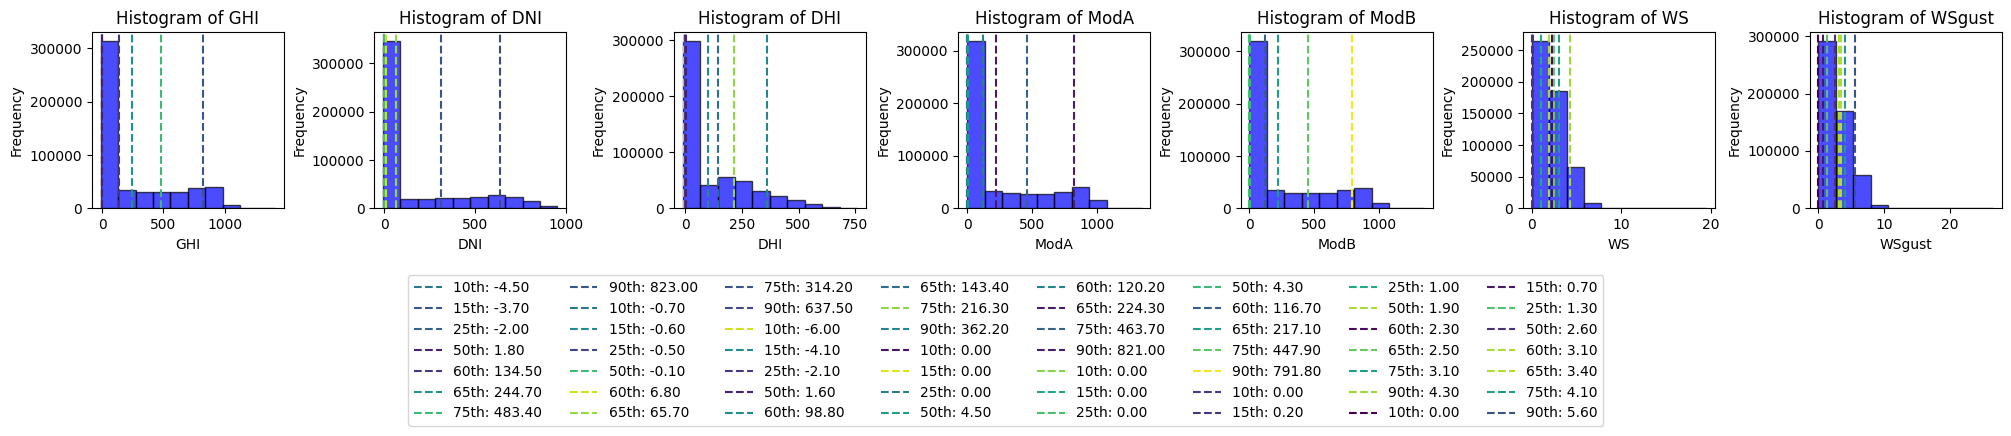

In [8]:
plot_histogram_with_percentiles(
    bn_df,
    columns=columns,
    percentiles=[10, 15, 25, 50, 60, 65, 75, 90],
    ncols=7,
    figsize=(20, 2.5),
    bins=10,
)

<Axes: >

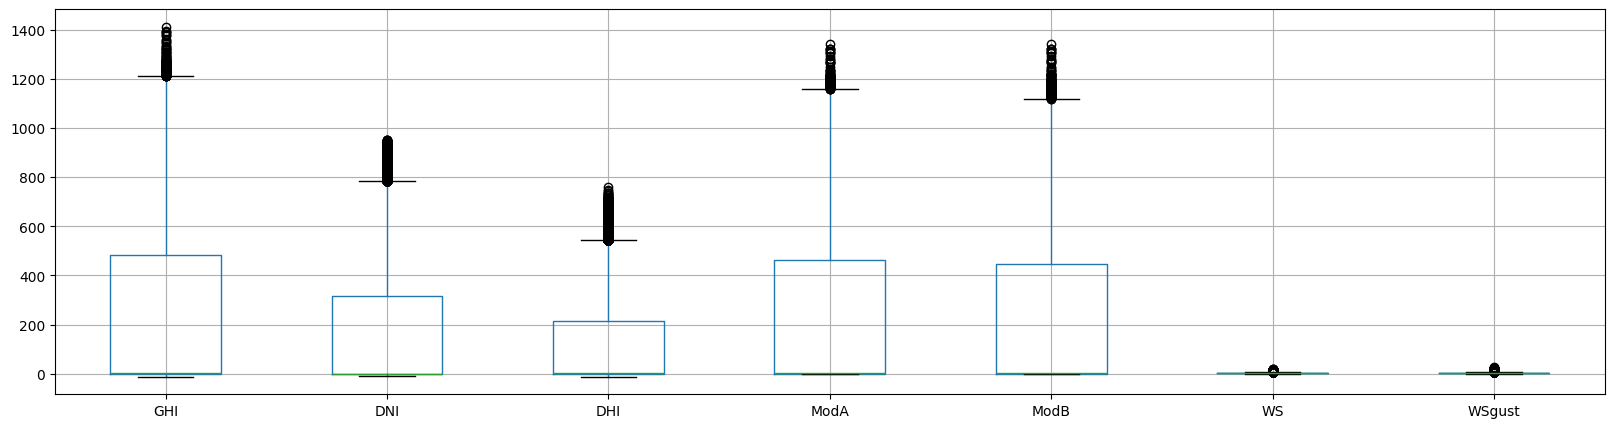

In [9]:
bn_df[columns].boxplot(figsize=(20, 5))

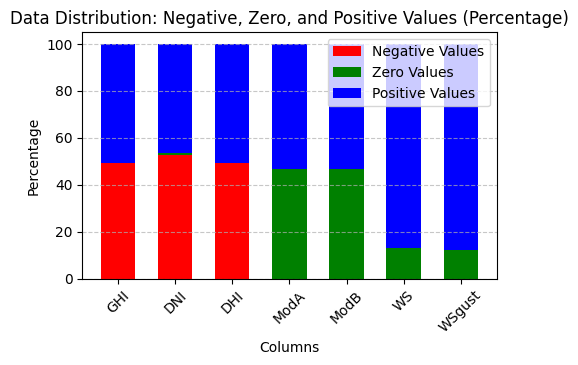

In [19]:
# Check the data distribution of positive, negative, and zero values
plot_entries(bn_df, columns=columns, figsize=(5, 3.75))

#### **Sierra Leone Solar Farm**

In [10]:
# Check for missing values
report_null_columns(sl_df)

{'Comments': 525600}

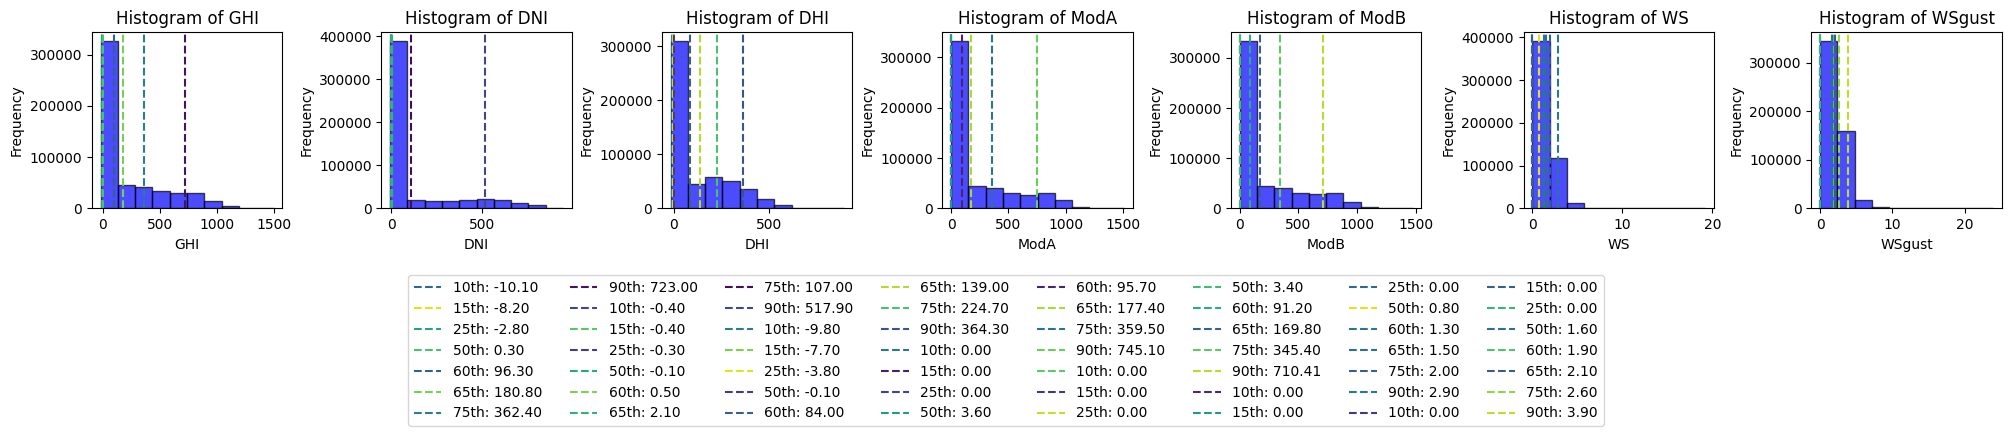

In [6]:
plot_histogram_with_percentiles(
    sl_df,
    columns=columns,
    percentiles=[10, 15, 25, 50, 60, 65, 75, 90],
    ncols=7,
    figsize=(20, 2.5),
    bins=10,
)

<Axes: >

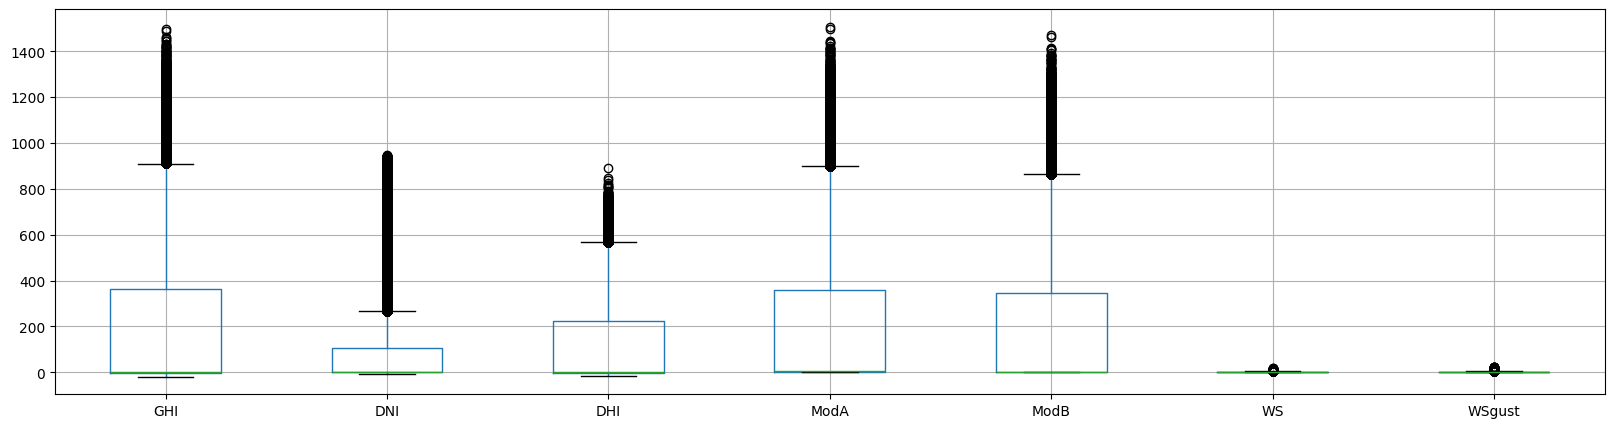

In [11]:
sl_df[columns].boxplot(figsize=(20, 5))

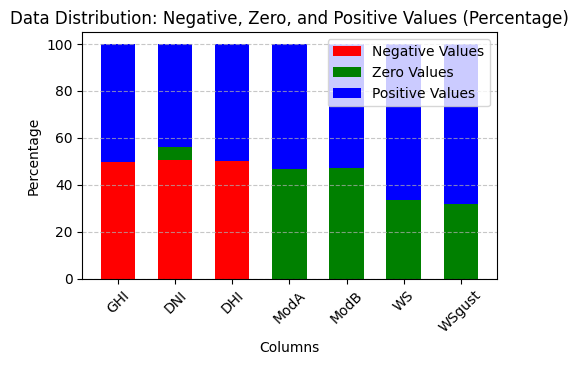

In [ ]:
# Check the data distribution of positive, negative, and zero values
plot_entries(sl_df, columns=columns, figsize=(5, 3.75))

#### **Togo Solar Farm**

In [24]:
# Check for missing values
report_null_columns(tg_df)

{'Comments': 525600}

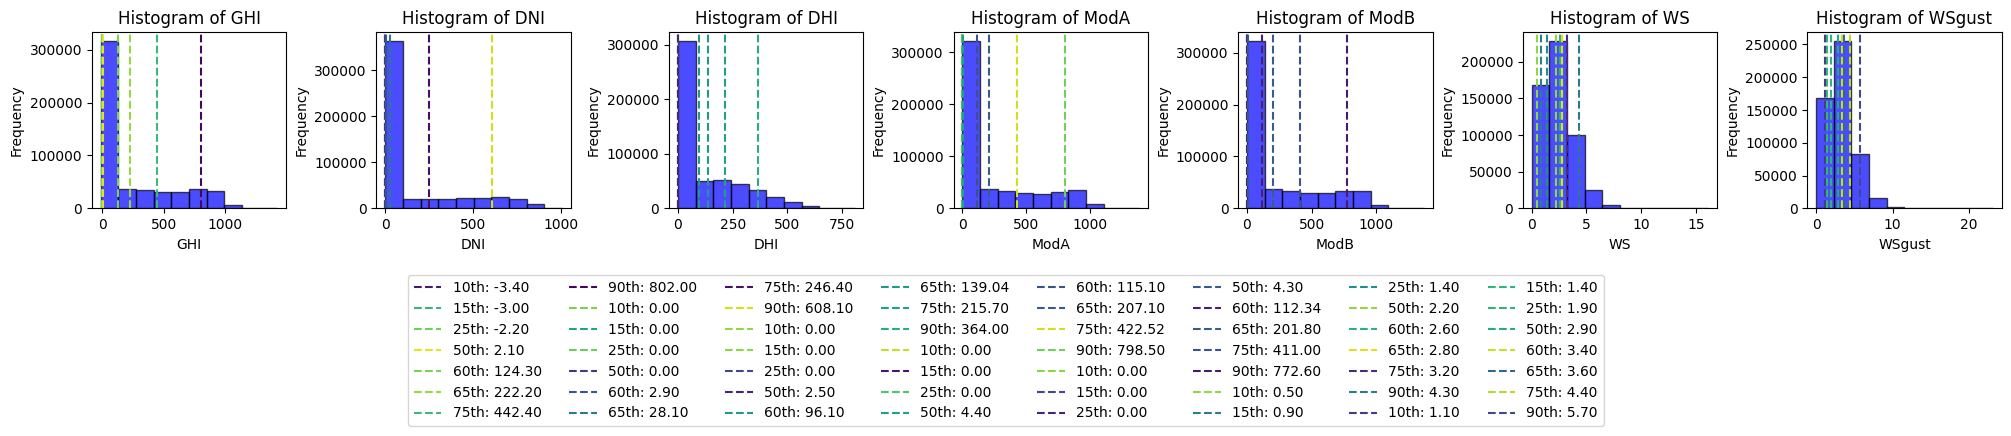

In [23]:
plot_histogram_with_percentiles(
    tg_df,
    columns=columns,
    percentiles=[10, 15, 25, 50, 60, 65, 75, 90],
    ncols=7,
    figsize=(20, 2.5),
    bins=10,
)

<Axes: >

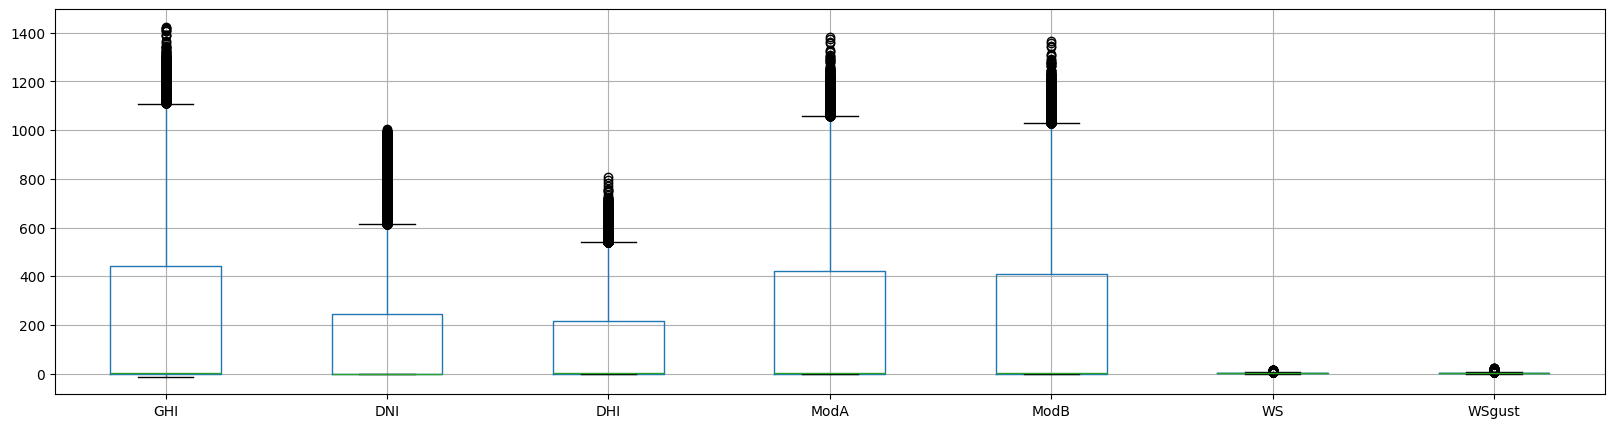

In [25]:
tg_df[columns].boxplot(figsize=(20, 5))

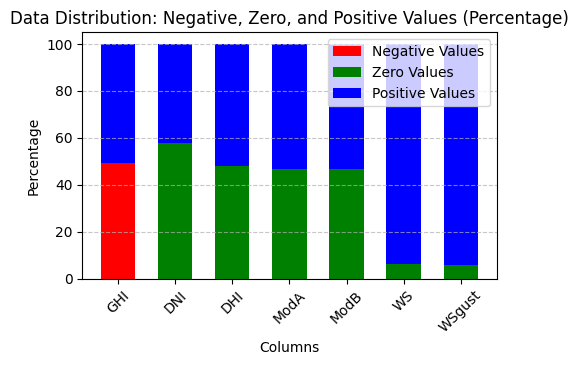

In [26]:
# Check the data distribution of positive, negative, and zero values
plot_entries(tg_df, columns=columns, figsize=(5, 3.75))

### **Time Series Analysis**

#### **Monthly Patterns of `GHI`, `DNI`, `DHI`, and `Tamb`**
**Benin:** Solar irradiance (`GHI`, `DNI`, `DHI`) follows a clear seasonal pattern, peaking during specific months (likely dry seasons) and declining in others (wet/cloudy seasons). Temperature (`Tamb`) remains relatively stable but shows slight seasonal variation, aligning with expected climatic patterns.

**Sierra Leone:** `GHI`, `DNI`, and `DHI` exhibit similar seasonal trends but at generally lower levels compared to Benin, indicating less solar resource availability.`Tamb` is stable but marginally lower compared to Benin, reflecting differences in local climate.

**Togo:** Seasonal solar patterns closely resemble Benin, with slightly lower peaks in `GHI` and `DNI`.`Tamb` shows minimal fluctuation throughout the year, indicating consistent temperature conditions.


#### **Seasonal Decomposition of `ModA` `and` ModB**
**Trend:** - All locations exhibit a steady long-term trend in sensor readings (`ModA`, `ModB`), with fluctuations primarily due to environmental factors such as seasonal variation in solar irradiance and temperature.

**Seasonality:**- Strong seasonal components are observed in all datasets, correlating with the monthly patterns of solar irradiance and temperature.

**Residuals:** The residual components highlight significant noise and outliers, potentially due to random environmental effects or sensor anomalies.


#### **Impact of Cleaning on Sensor Readings (`ModA`, `ModB`)**

**Boxplots Analysis:** Sensor readings post-cleaning show reduced variability and fewer extreme outliers, indicating improved data quality. The mean readings for `ModA` `and` ModB increase significantly after cleaning, suggesting that dust or debris negatively affected sensor performance before cleaning.

**Trend Plots:** The time series trends of `ModA` `and` ModB clearly differentiate the periods before and after cleaning. Post-cleaning periods show more consistent and elevated readings, reinforcing the impact of cleaning on sensor performance.

**Statistical Analysis:**
   - **Benin:** The T-test results show a significant difference between pre-cleaning and post-cleaning readings for both `ModA` `and` ModB (P-value: `1.92e-06`), indicating that cleaning had a statistically significant positive effect.

   - **Sierra Leone:** A significant increase in mean sensor readings is observed post-cleaning (P-value: `5.85e-07`), confirming that cleaning greatly enhanced sensor performance.

   - **Togo:** The effect of cleaning is most pronounced here, with P-value: `5.96e-60`. This result strongly suggests that cleaning substantially improves sensor accuracy, highlighting the importance of regular maintenance.



#### **Benin Solar Farm**

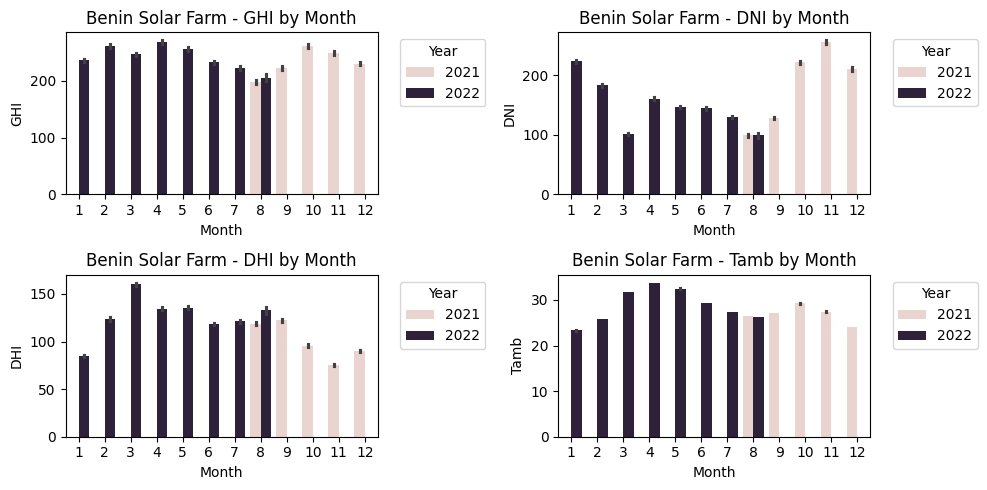

In [33]:
plot_trends(
    bn_df,
    ["GHI", "DNI", "DHI", "Tamb"],
    period="Month",
    ncols=2,
    figsize=(10, 5),
    title_prefix="Benin Solar Farm",
)

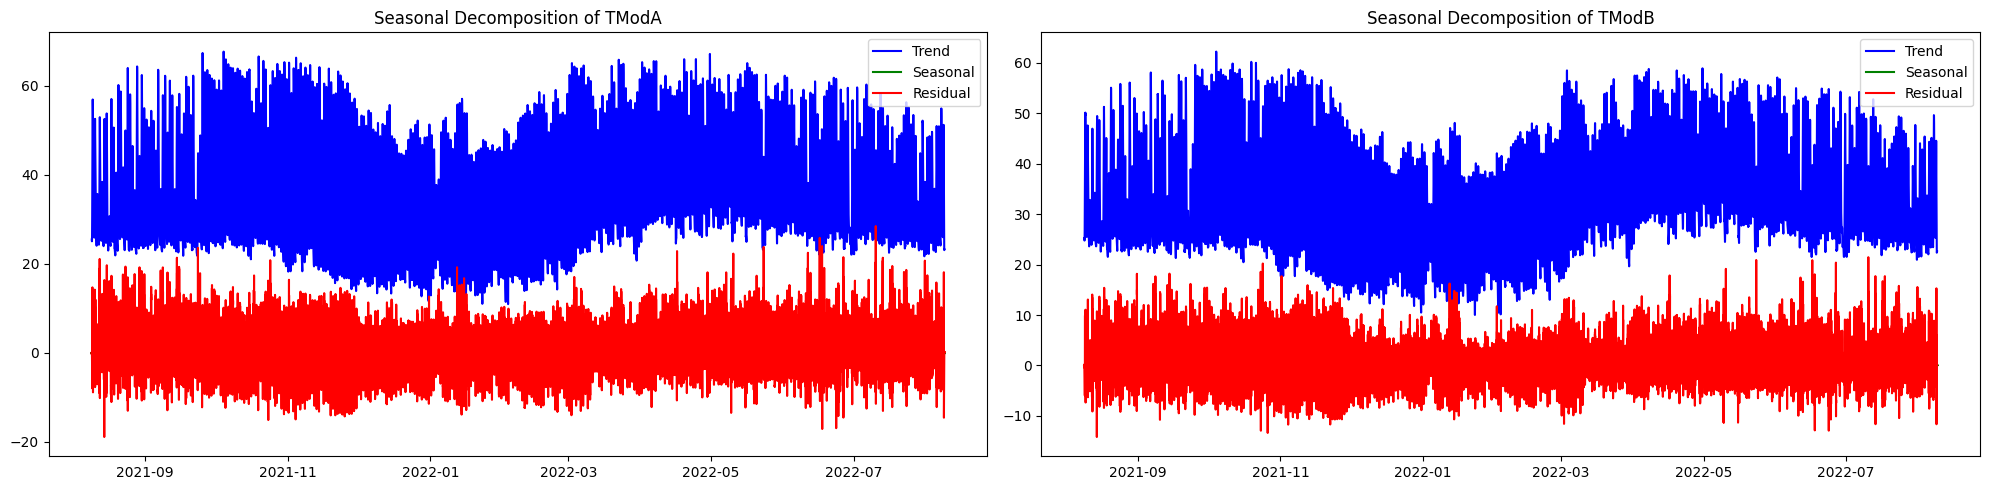

In [28]:
plot_seasonal_decomposition(bn_df, columns=["TModA", "TModB"], period=365)

In [37]:
display(bn_df.Cleaning.value_counts())
cleaning_groups = bn_df.groupby("Cleaning")[["ModA", "ModB"]]

# Calculate mean and standard deviation
stats = cleaning_groups.agg(["mean", "std"])

display(stats)

modA_before = bn_df[bn_df["Cleaning"] == 0]["ModA"]
modA_after = bn_df[bn_df["Cleaning"] == 1]["ModA"]

# Perform t-test
t_stat, p_value = ttest_ind(modA_before, modA_after)

print("T-Statistic", t_stat, f"P-Value: {p_value}")

Cleaning
0    525115
1       485
Name: count, dtype: int64

ModA                    ModB            
                mean         std        mean         std
Cleaning                                                
0         236.524253  327.002662  228.816071  316.640506
1         307.229278  159.987048  301.972165  153.643905

T-Statistic -4.7612561786164465 P-Value: 1.9244275578305625e-06


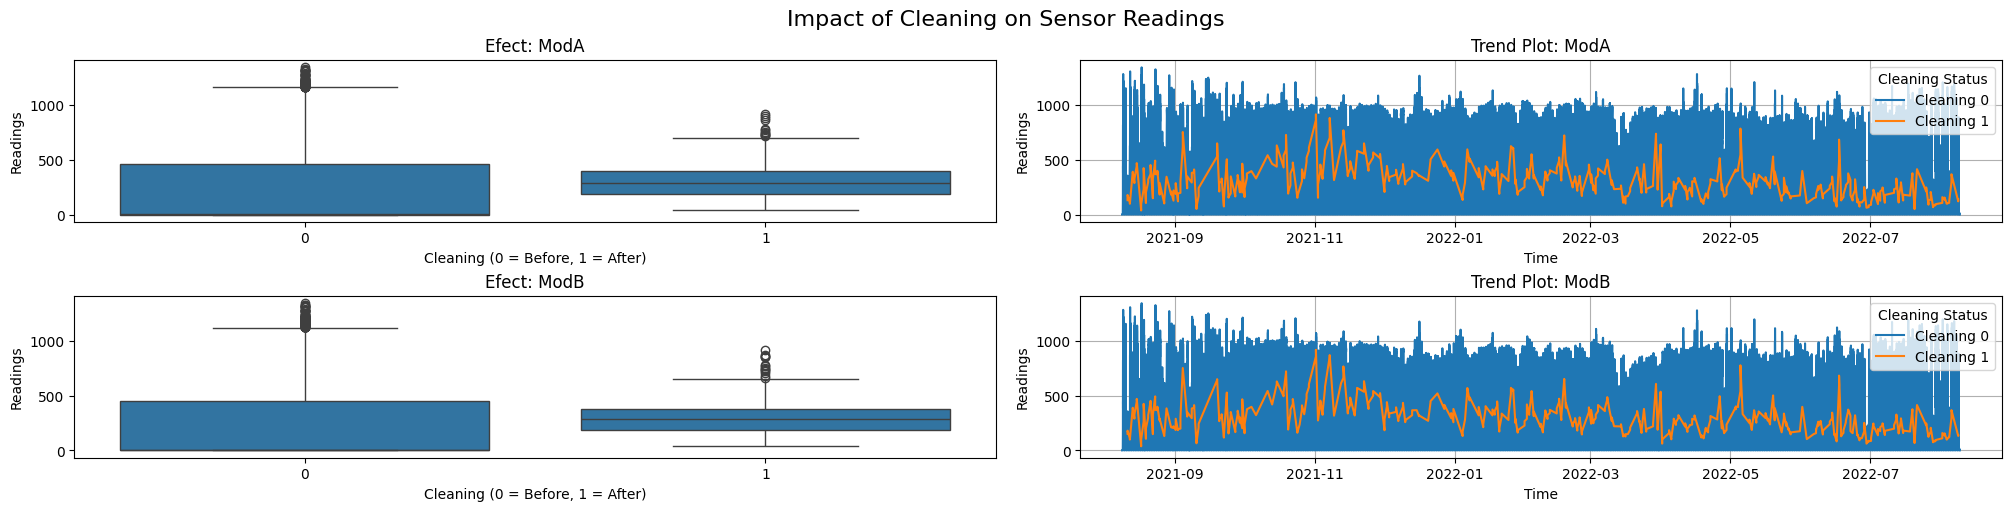

In [ ]:
plot_cleaning_impact(bn_df, ["ModA", "ModB"], figsize=(20, 5))

#### **Sierra Leone Solar Farm**

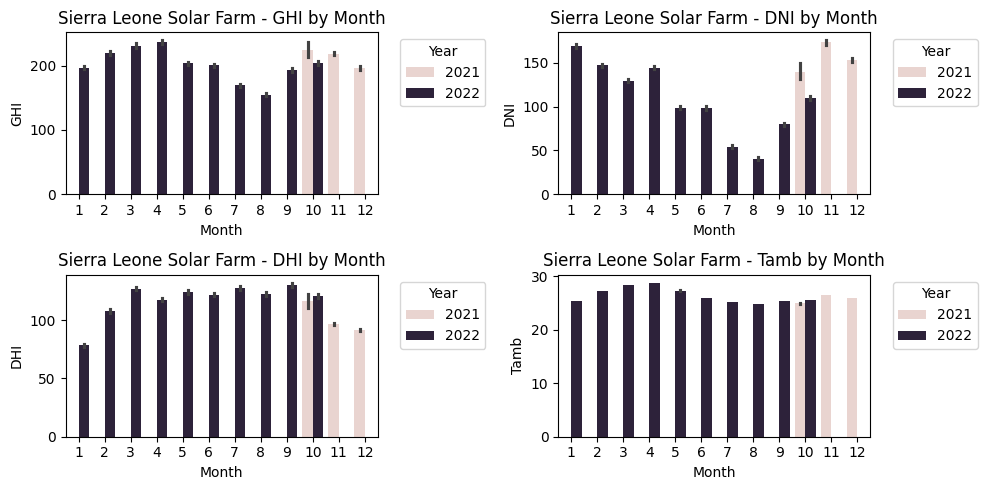

In [42]:
plot_trends(
    sl_df,
    ["GHI", "DNI", "DHI", "Tamb"],
    period="Month",
    ncols=2,
    figsize=(10, 5),
    title_prefix="Sierra Leone Solar Farm",
)

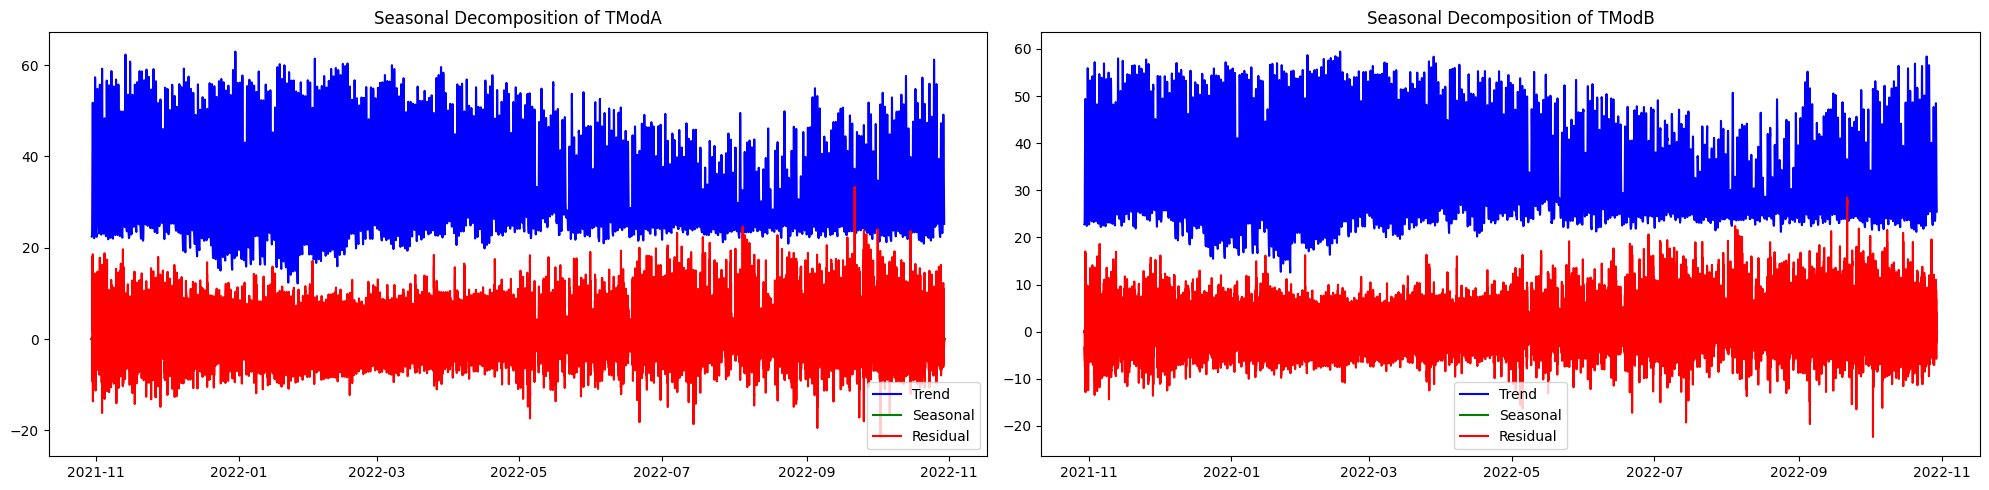

In [43]:
plot_seasonal_decomposition(sl_df, columns=["TModA", "TModB"], period=365)

In [44]:
display(sl_df.Cleaning.value_counts())
cleaning_groups = sl_df.groupby("Cleaning")[["ModA", "ModB"]]

# Calculate mean and standard deviation
stats = cleaning_groups.agg(["mean", "std"])

display(stats)

modA_before = sl_df[sl_df["Cleaning"] == 0]["ModA"]
modA_after = sl_df[sl_df["Cleaning"] == 1]["ModA"]

# Perform t-test
t_stat, p_value = ttest_ind(modA_before, modA_after)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

Cleaning
0    525092
1       508
Name: count, dtype: int64

ModA                    ModB            
                mean         std        mean         std
Cleaning                                                
0         206.578599  300.991724  198.038150  288.973612
1         273.309252  164.758517  277.231102  163.548855

T-Statistic: -4.996195800303254, P-Value: 5.849099333950434e-07


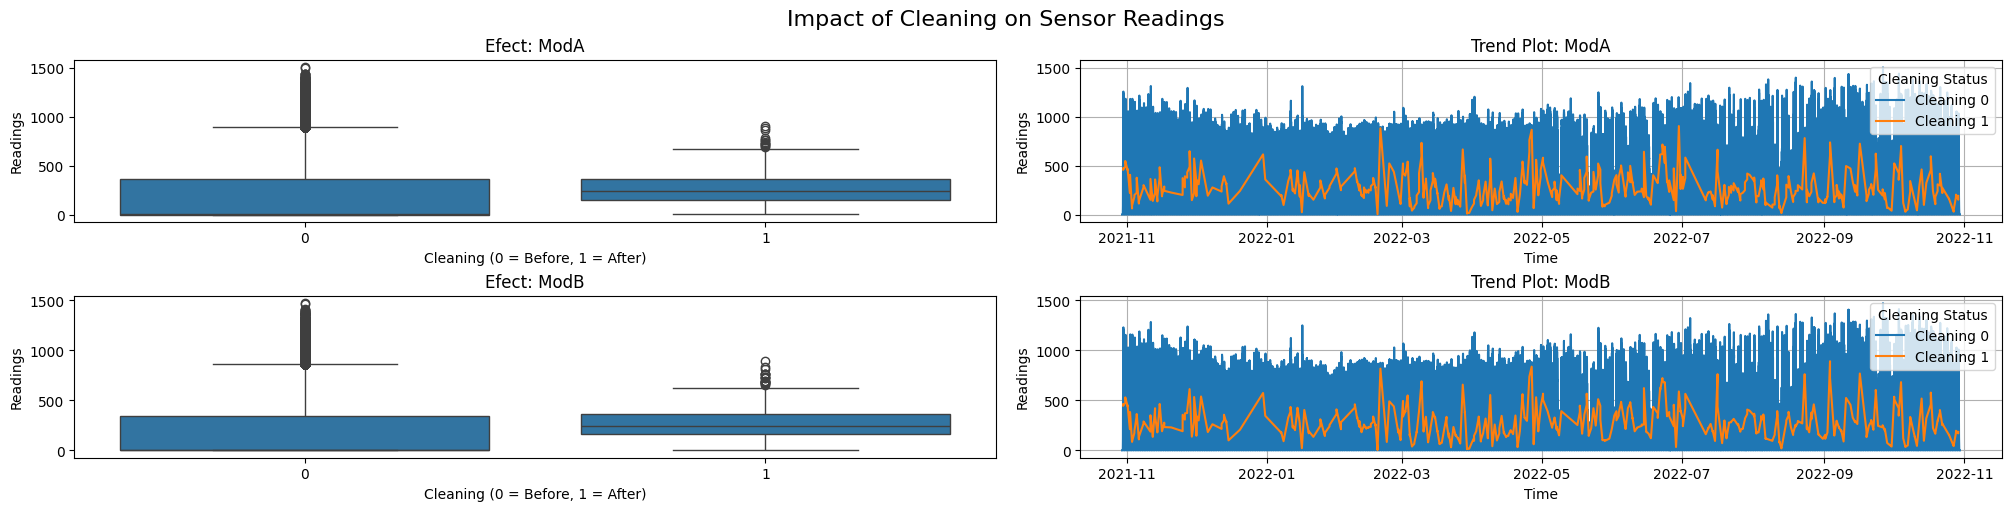

In [46]:
plot_cleaning_impact(sl_df, ["ModA", "ModB"], figsize=(20, 5))

#### **Togo Solar Farm**

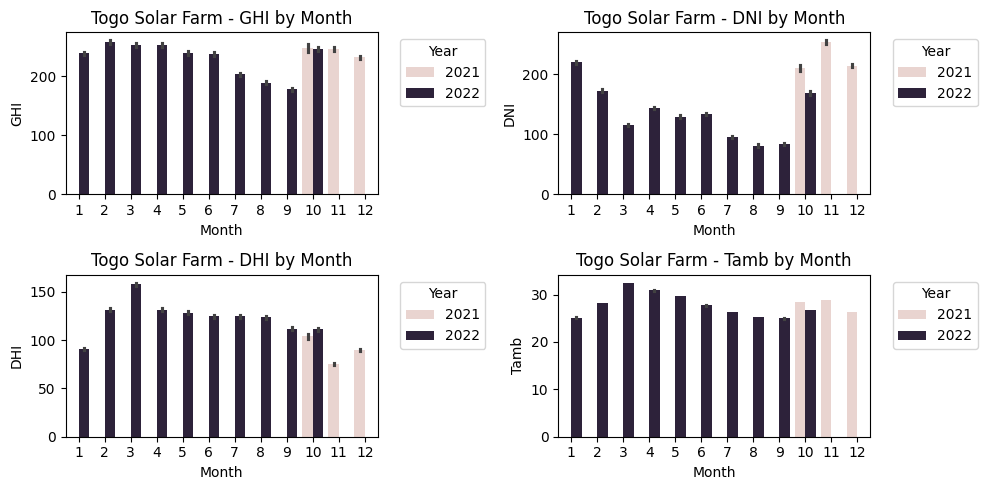

In [47]:
plot_trends(
    tg_df,
    ["GHI", "DNI", "DHI", "Tamb"],
    period="Month",
    ncols=2,
    figsize=(10, 5),
    title_prefix="Togo Solar Farm",
)

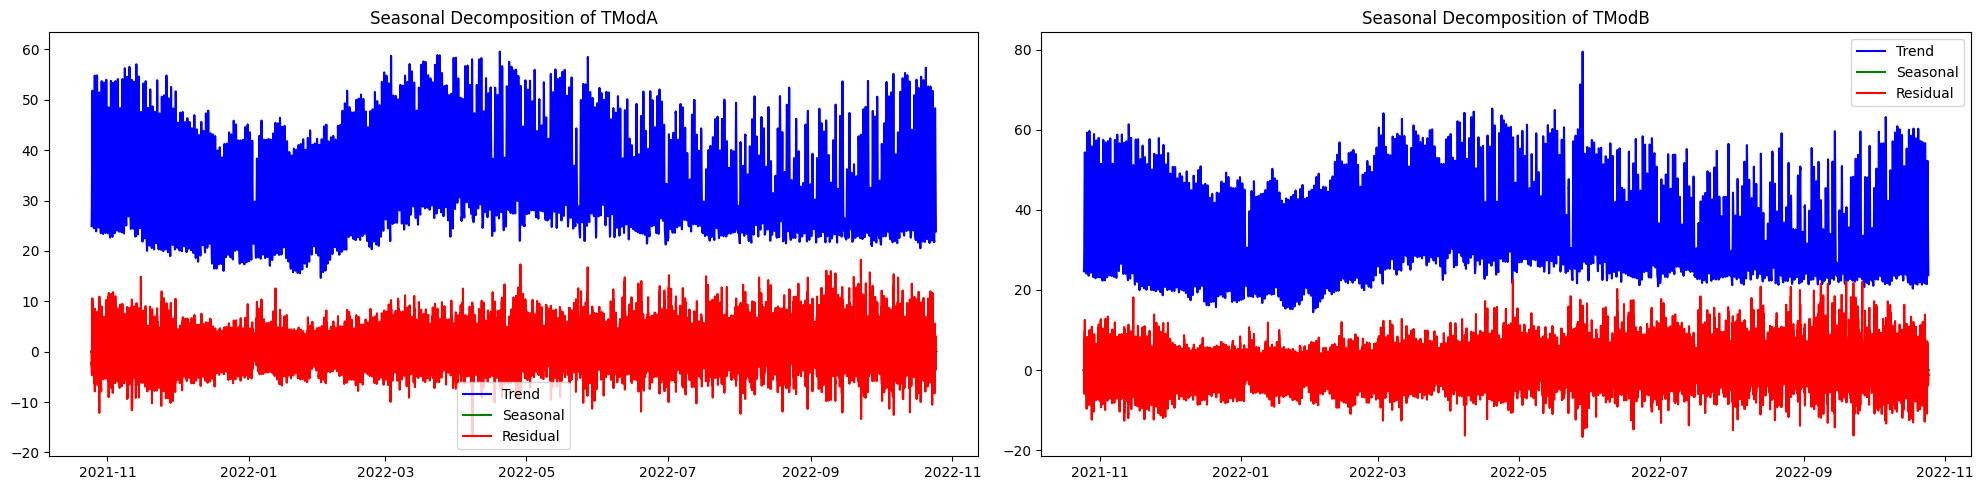

In [48]:
plot_seasonal_decomposition(tg_df, columns=["TModA", "TModB"], period=365)

In [49]:
print(tg_df.Cleaning.value_counts())
cleaning_groups = tg_df.groupby("Cleaning")[["ModA", "ModB"]]

# Calculate mean and standard deviation
stats = cleaning_groups.agg(["mean", "std"])

display(stats)

modA_before = tg_df[tg_df["Cleaning"] == 0]["ModA"]
modA_after = tg_df[tg_df["Cleaning"] == 1]["ModA"]

# Perform t-test
t_stat, p_value = ttest_ind(modA_before, modA_after)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

Cleaning
0    525319
1       281
Name: count, dtype: int64


ModA                    ModB            
                mean         std        mean         std
Cleaning                                                
0         225.979064  317.303768  219.401351  307.882893
1         535.186477  237.849443  532.211744  233.107743

T-Statistic: -16.332865684801266, P-Value: 5.961129486127938e-60


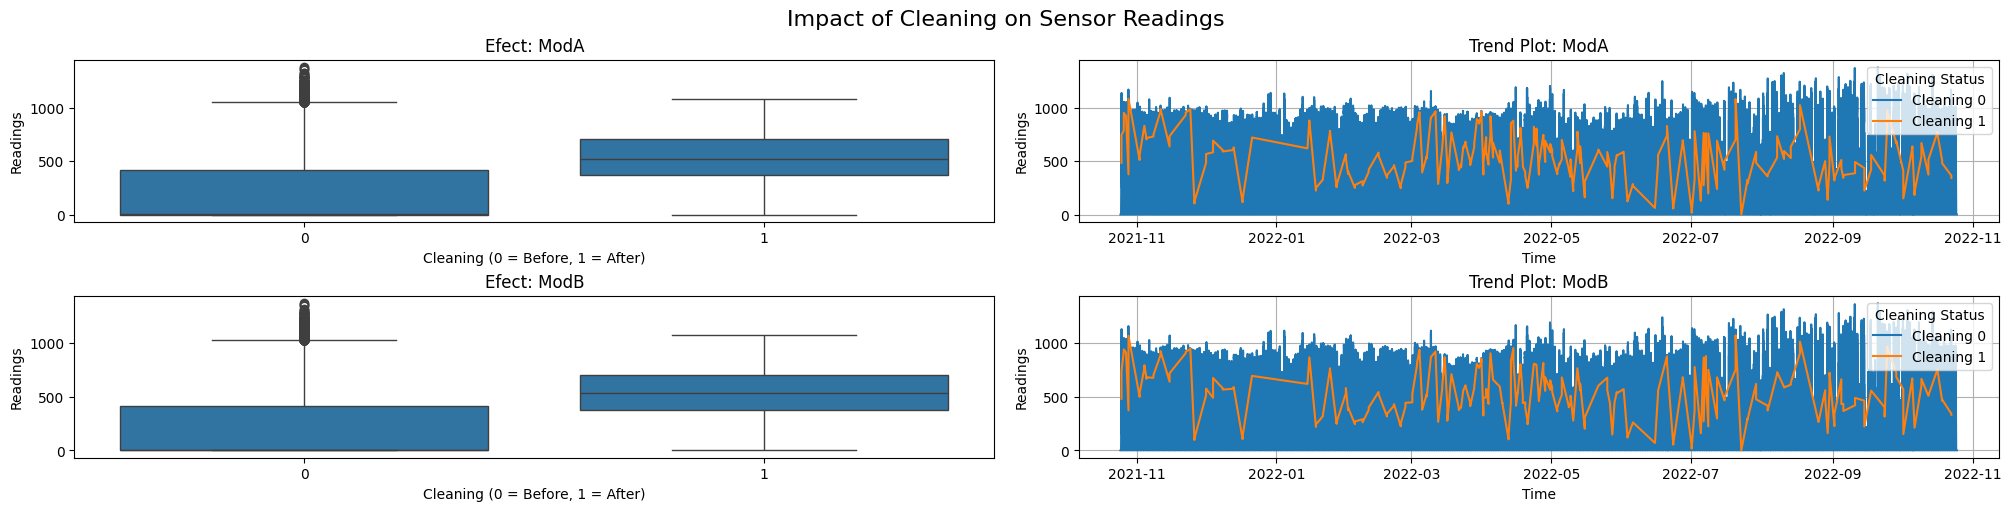

In [51]:
plot_cleaning_impact(tg_df, ["ModA", "ModB"], figsize=(20, 5))

### **Correlation Analysis**

**Solar Irradiance Components (`GHI`, `DNI`, `DHI`):** `GHI` is highly correlated with `ModA` `and` ModB (correlation coefficient ~0.99), confirming that these modules are primarily driven by global horizontal irradiance.  `DNI` has a slightly weaker correlation (~0.88) with `ModA` `and` ModB, suggesting that direct irradiance is not the sole determinant of sensor output. `DHI` shows the lowest correlation among solar components (~0.85), indicating a reduced influence of diffuse radiation compared to direct and global irradiance.

**Temperature Relationships (`Tamb`, T`ModA`, `TModB`):** Moderate correlations (~0.55-0.65) between solar components (`GHI`, `DNI`, `DHI`) and `Tamb`/TMod metrics. This indicates that temperature increases alongside irradiance but is not a direct driver of the observed variation. The strong correlation between T`ModA` `and` TModB (~0.99) reflects their similar measurement functionality and shared response to environmental conditions.

**Wind Conditions (WS, `WSgust`):** Weak correlations (~0.40-0.45) with solar irradiance components (`GHI`, `DNI`, `DHI`) and module outputs (`ModA`, `ModB`), suggesting minimal direct influence of wind on irradiance or sensor readings. High correlation (~0.98) between WS and `WSgust` highlights their shared dynamics, likely representing transient weather events.

**Scatter Patterns:** Linear relationships are prominent between `GHI` and `ModA`/`ModB`, affirming that sensor readings scale proportionally with global horizontal irradiance.Non-linear trends between `Tamb` and solar components indicate external factors influencing temperature, such as seasonal cycles. Random scatter between wind metrics and irradiance supports the lack of a direct relationship.

In [52]:
corr_columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust", "Tamb"]

#### **Benin Solar Farm**

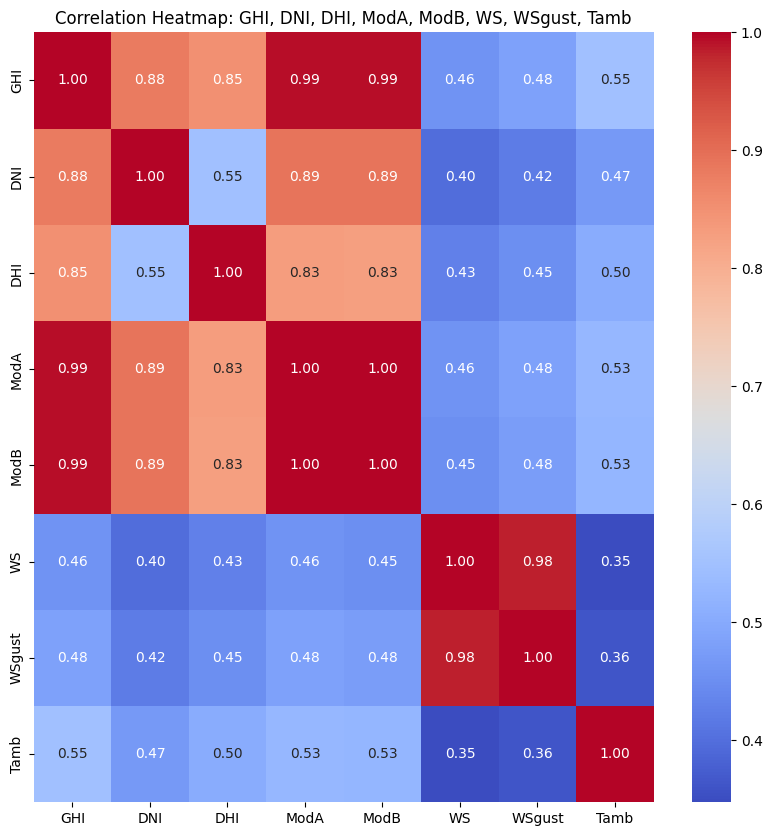

In [53]:
plot_correlation_heatmap(bn_df, columns=corr_columns, figsize=(10, 10))

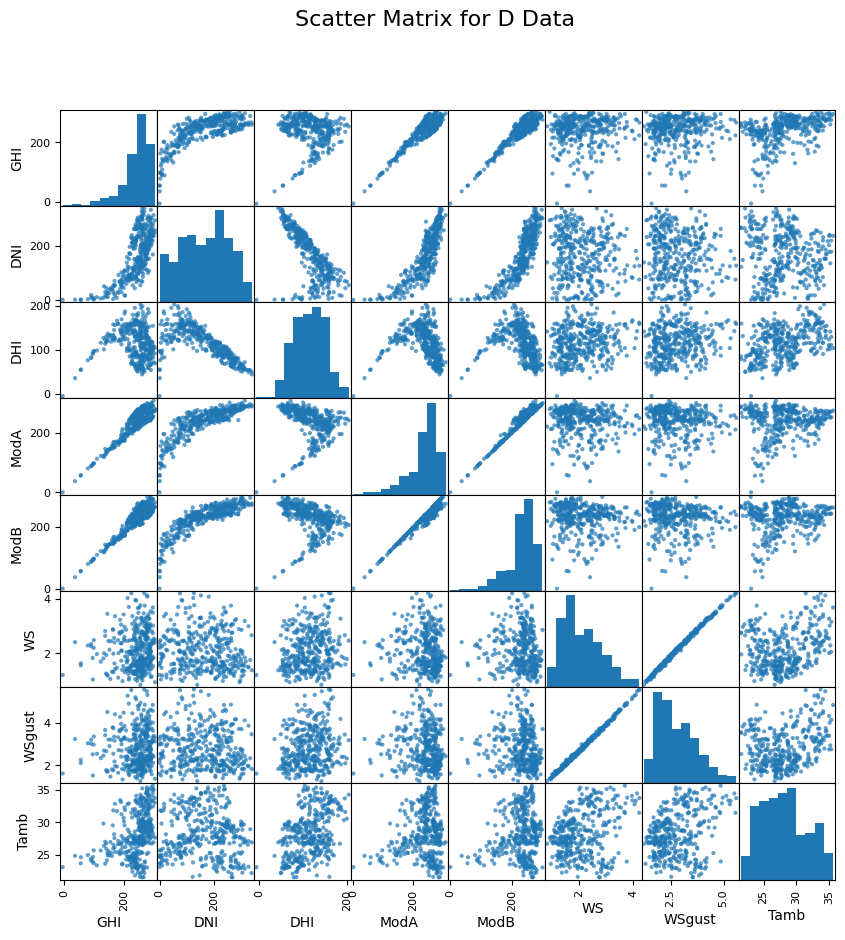

In [54]:
plot_scatter_matrix(bn_df, columns=corr_columns)

#### **Sierra Leone Solar Farm**

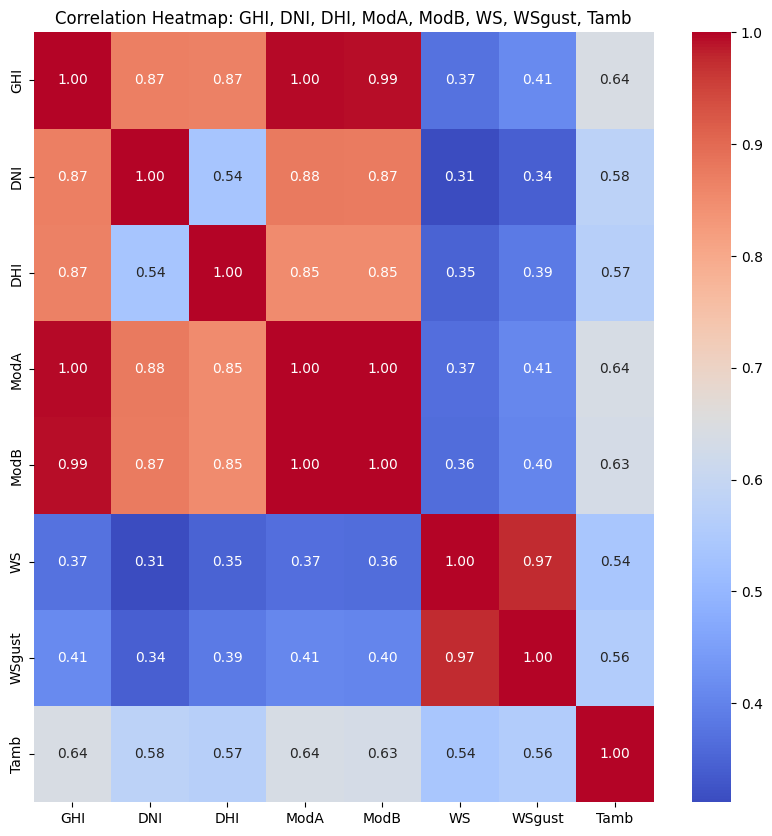

In [55]:
plot_correlation_heatmap(sl_df, columns=corr_columns, figsize=(10, 10))

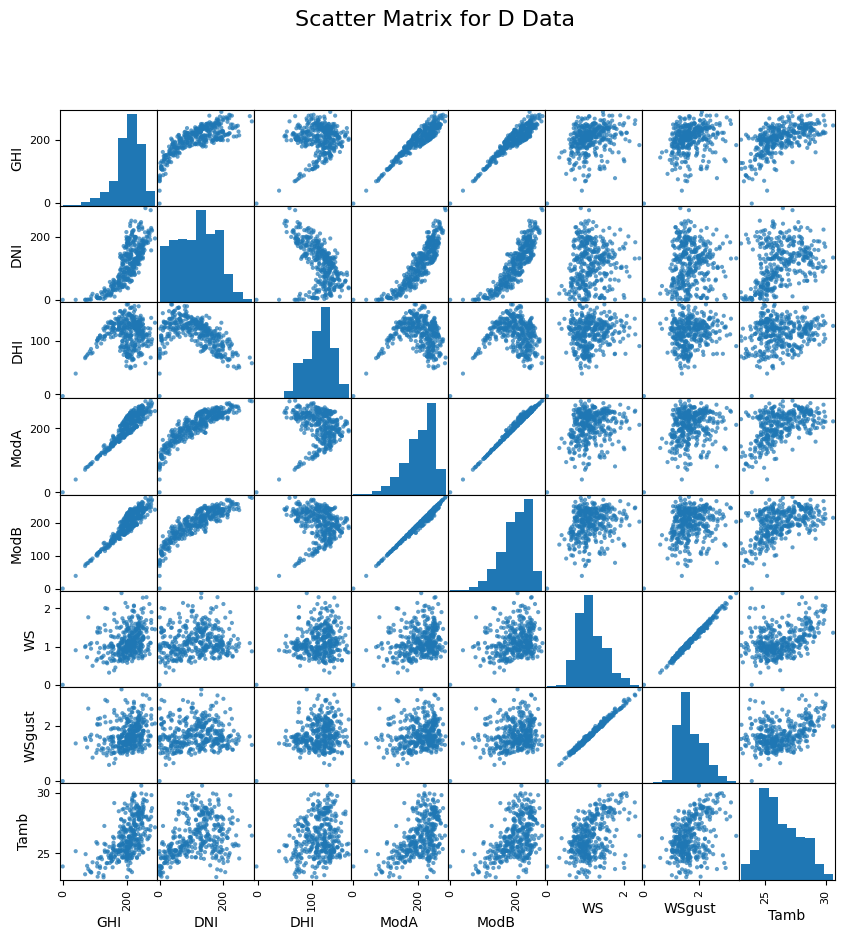

In [56]:
plot_scatter_matrix(sl_df, columns=corr_columns)

#### **Togo Solar Farm**

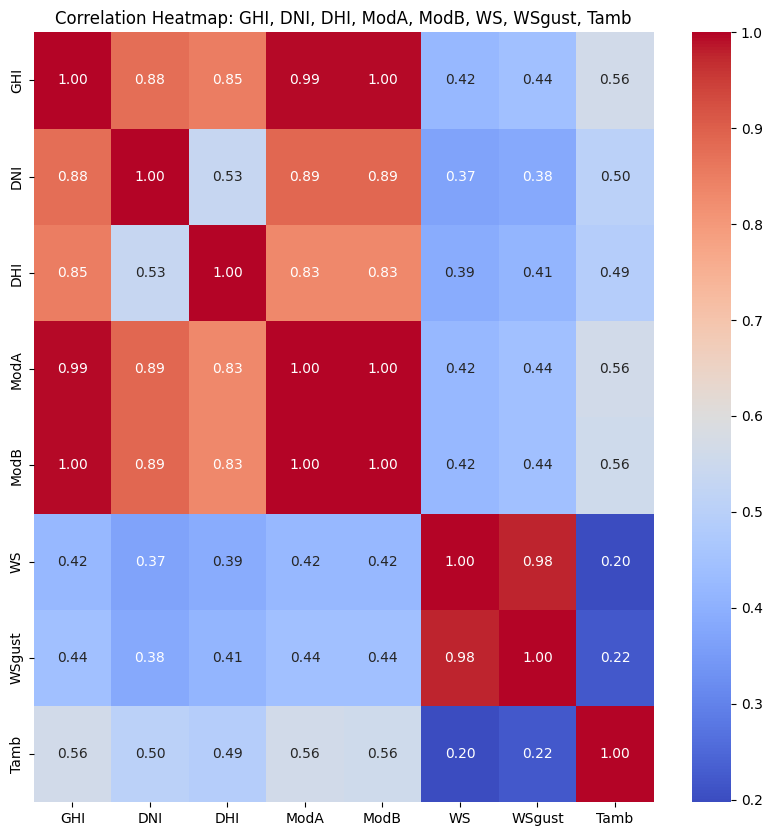

In [57]:
plot_correlation_heatmap(tg_df, columns=corr_columns, figsize=(10, 10))

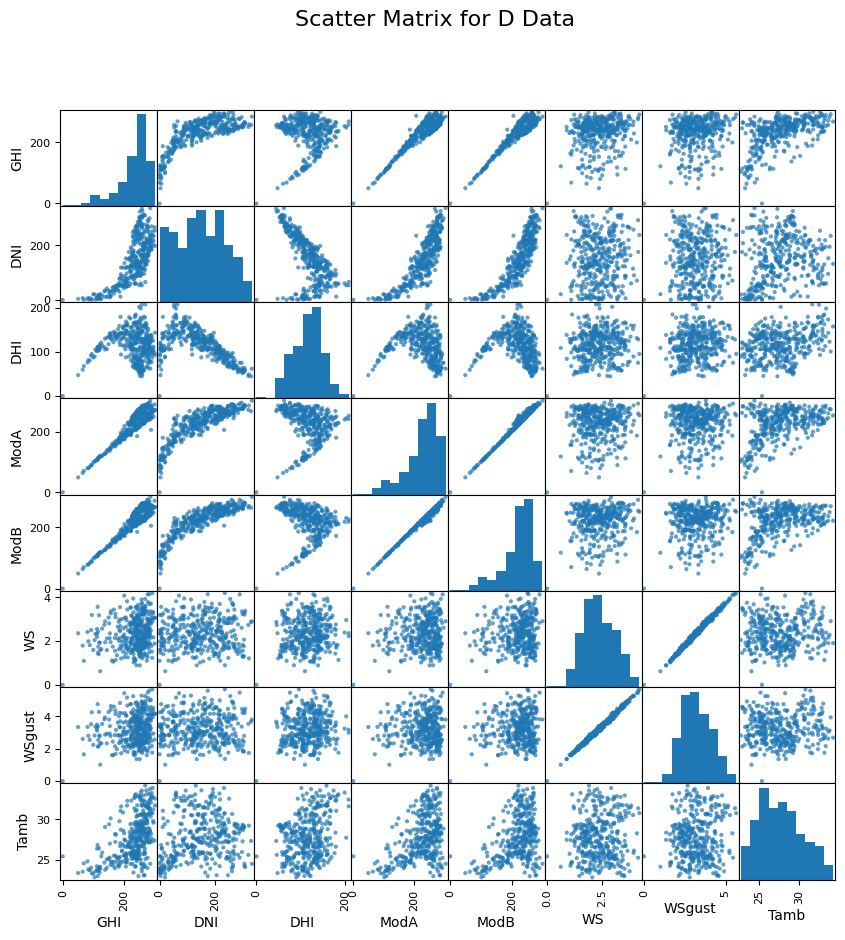

In [58]:
plot_scatter_matrix(tg_df, columns=corr_columns)

### **Wind Analysis**

The radial bar plots and wind roses illustrate the distribution of wind speed, gusts, and directional variability for the three locations:

**Wind Speed Distribution** All three locations show a dominant wind speed direction from the North, with occasional contributions from the West and Southwest.

Benin exhibits a more balanced wind distribution with moderate speeds (~14 m/s) across several directions, suggesting a diverse wind flow pattern. Sierra Leone has concentrated higher wind speeds (~33 m/s) from the North, reflecting a more localized and directional wind pattern. Togo displays a mix of moderate to high speeds, primarily aligned with Northern and Southwestern directions, indicating a combination of steady and transitional winds.

**Wind Gust Distribution** Wind gusts closely align with wind speed distributions, reflecting similar directional trends across all locations.

Gust magnitudes are notably higher in Sierra Leone, likely influenced by geographical or climatic factors, emphasizing the prevalence of extreme wind events in this region. Benin and Togo show relatively consistent gust patterns, with lower variability in magnitude compared to Sierra Leone.

**Wind Direction Variability** Directional variability is lowest in Sierra Leone, reinforcing the dominance of the Northern wind flow with minimal fluctuation.

Benin exhibits higher variability, especially in the Western and Southwestern directions, suggesting more dynamic and less predictable wind behavior. Togo’s variability is moderate, balancing between stable Northern winds and occasional shifts to the West and South.

#### **Benin Solar Farm**

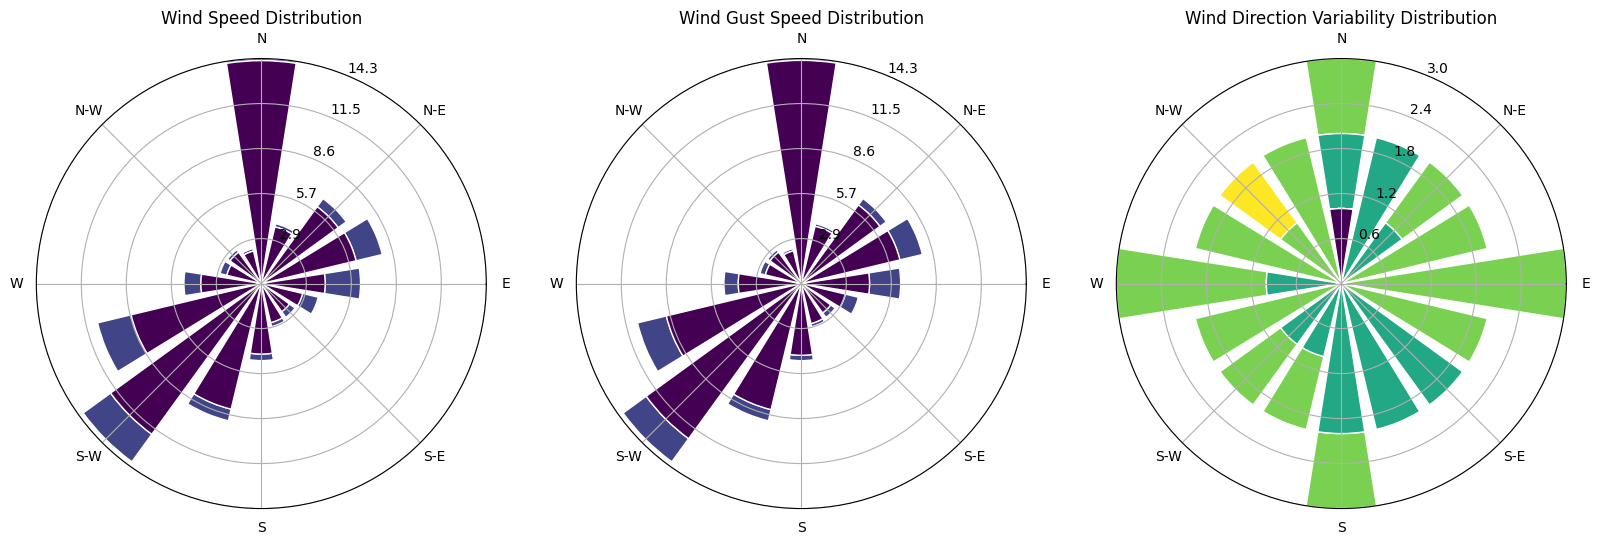

In [59]:
plot_windrose_distribution(bn_df)

#### **Sierra Leone Solar Farm**

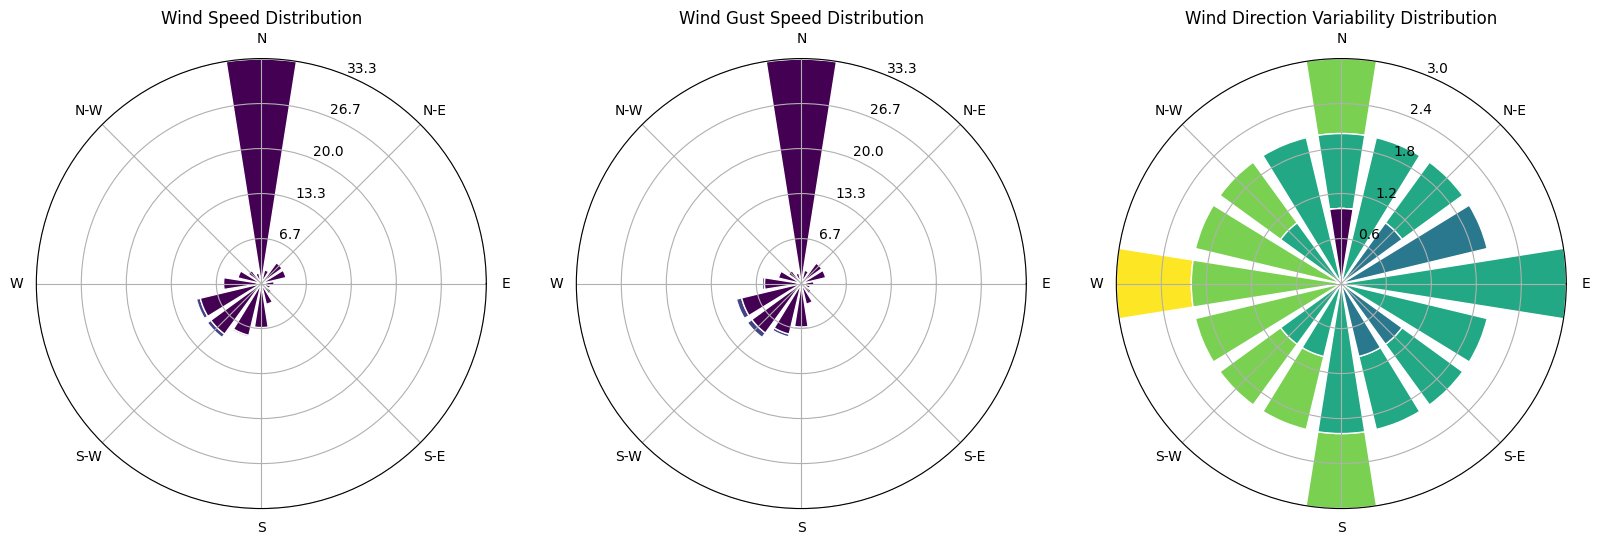

In [60]:
plot_windrose_distribution(sl_df)

#### **Togo Solar Farm**

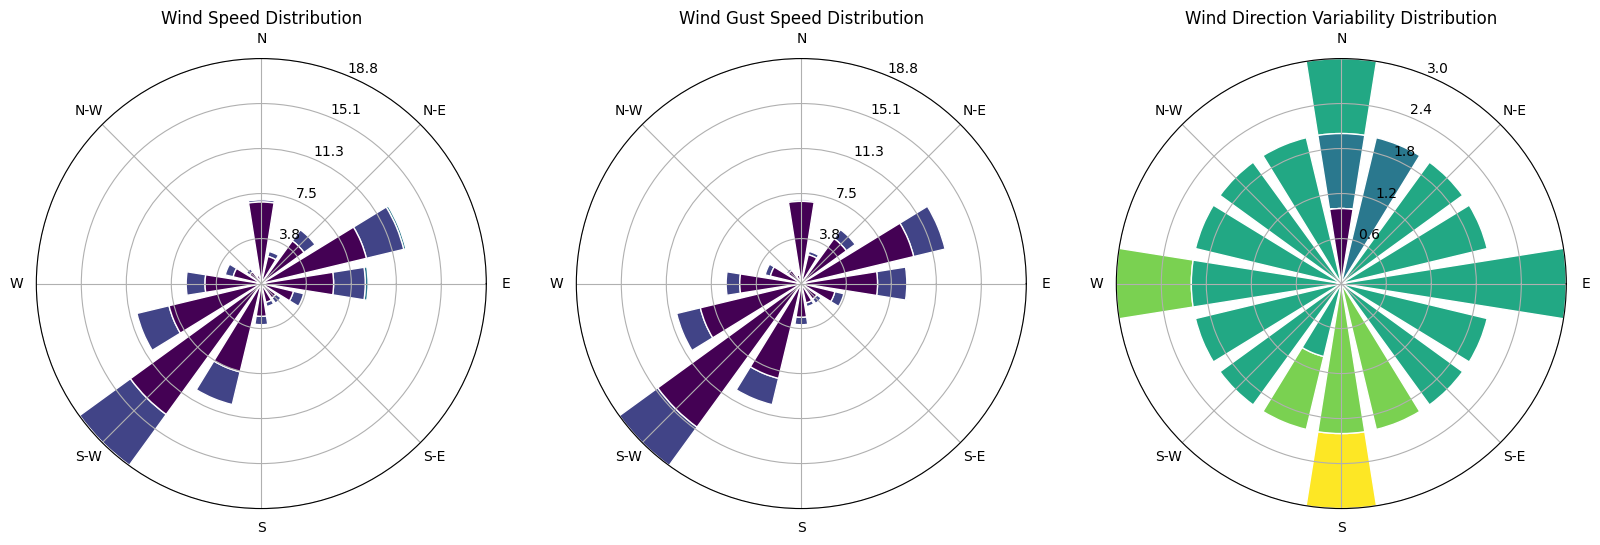

In [61]:
plot_windrose_distribution(tg_df)

### **Temperature Analysis**

**Influence of Relative Humidity (RH)**: A negative correlation exists between `RH` and temperature readings (`TModA`, `TModB`) with correlation coefficients around -0.34 and -0.32, respectively. Higher humidity tends to slightly reduce recorded temperatures. Boxplots further confirm that lower `RH` categories correspond to higher temperatures, suggesting a cooling effect of humidity.

**Impact on Solar Radiation** Solar radiation components (`GHI`, `DNI`, `DHI`) show moderate negative correlations with `RH` (-0.36 to -0.29). High `RH` reduces the intensity of solar irradiance, possibly due to increased cloud cover or atmospheric moisture.

In [74]:
temp_cols = ["RH", "TModA", "TModB", "GHI", "DNI", "DHI"]

#### **Benin Solar Farm**

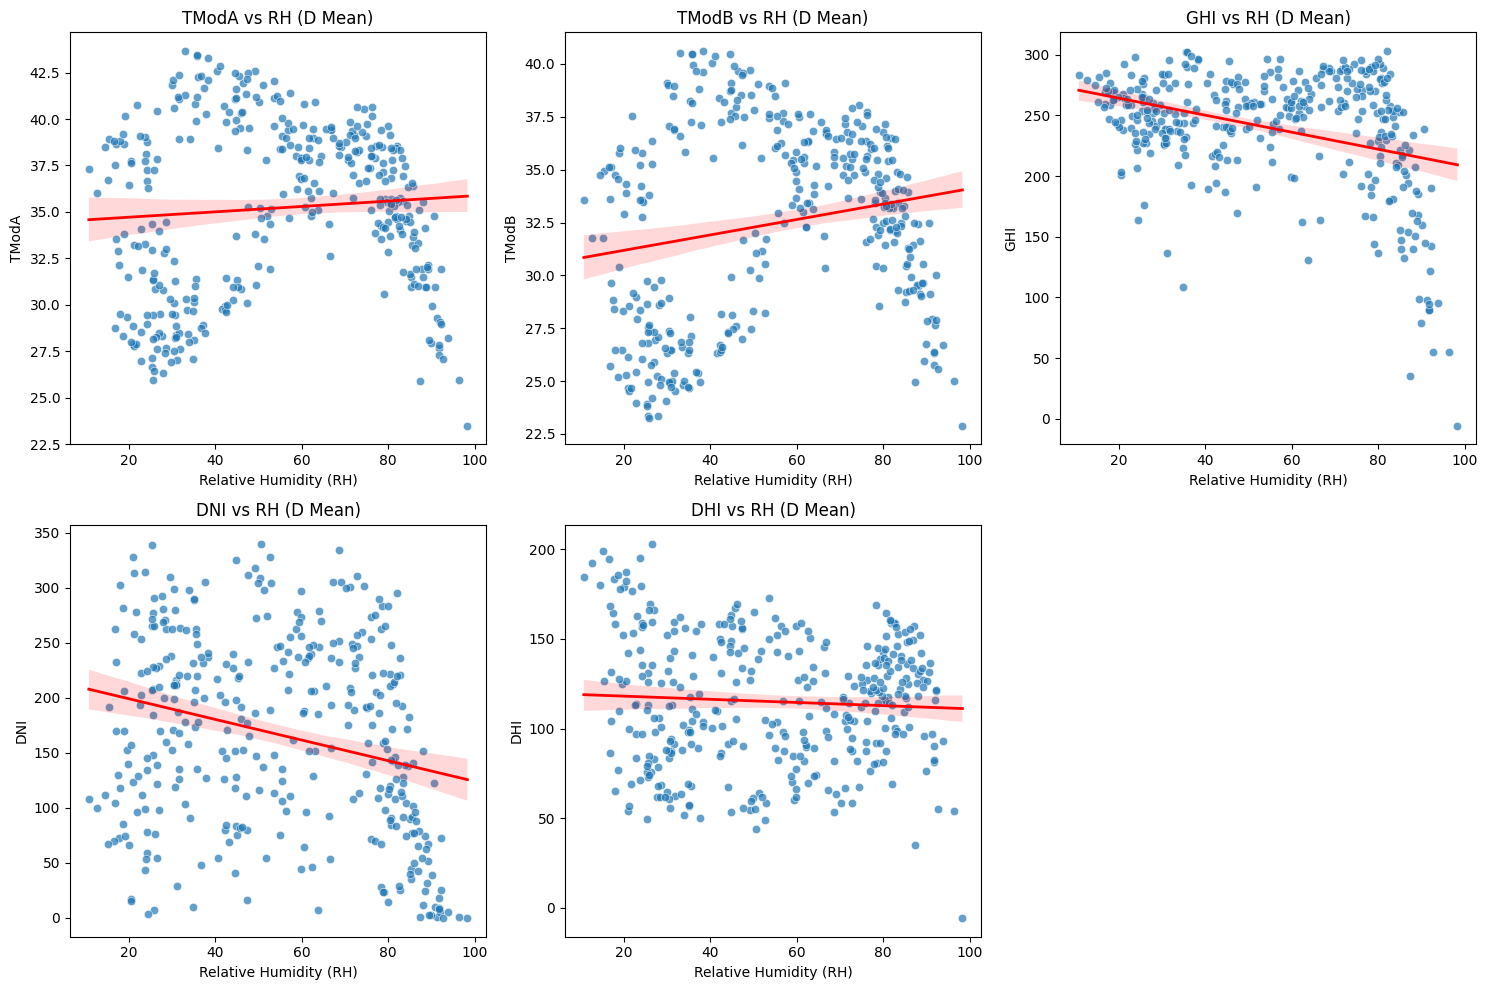

In [62]:
analyze_rh_impact(bn_df)

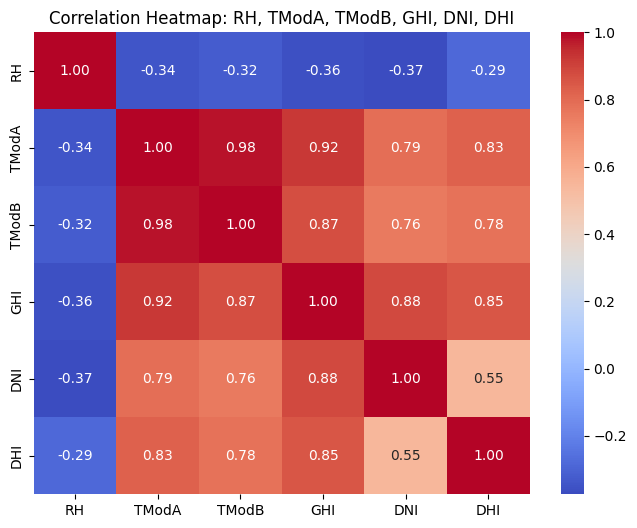

In [66]:
plot_correlation_heatmap(bn_df, temp_cols)

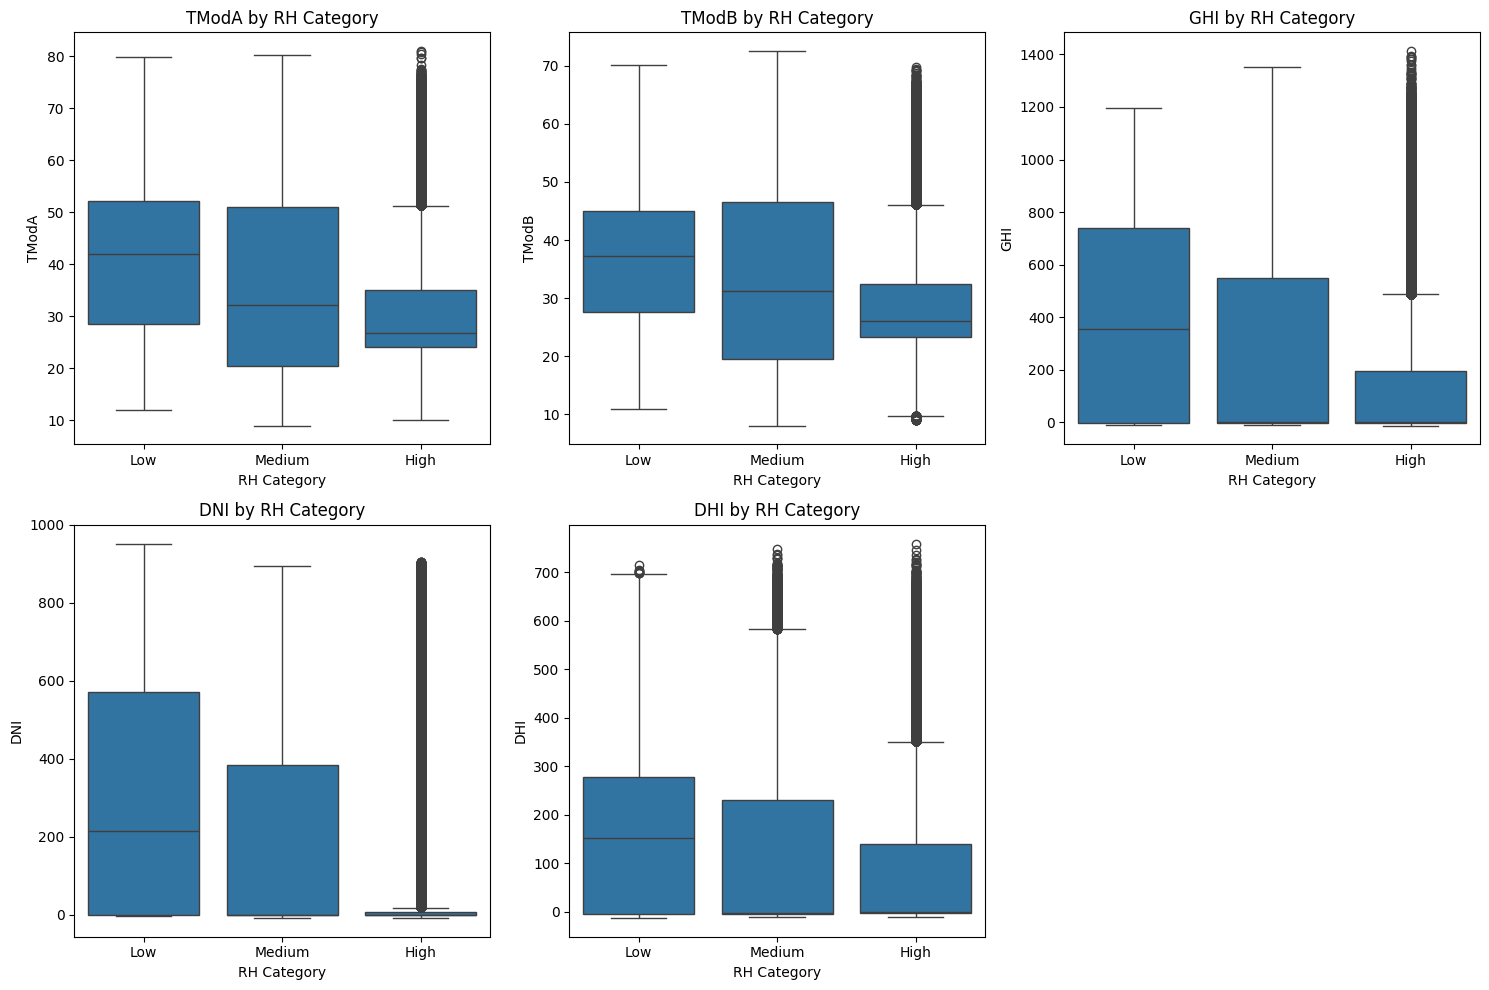

In [67]:
plot_boxplot_rh_categories(bn_df)

#### **Sierra Leone Solar Farm**

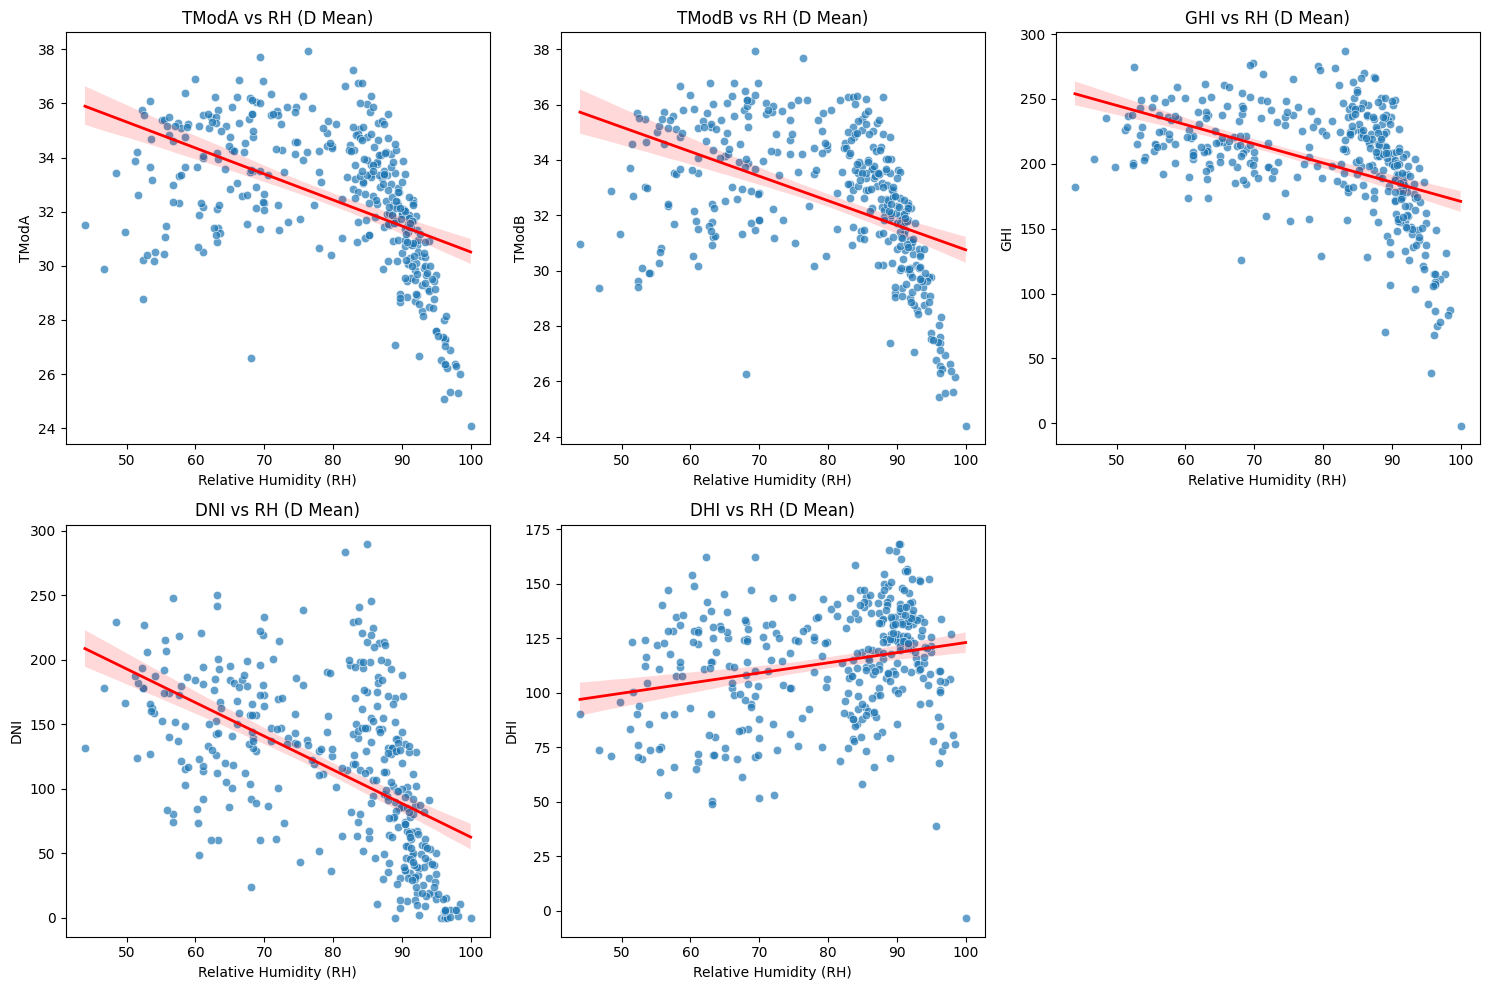

In [68]:
analyze_rh_impact(sl_df)

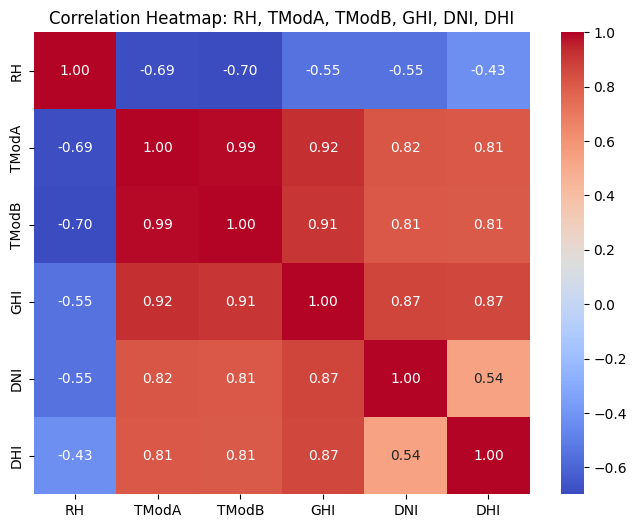

In [69]:
plot_correlation_heatmap(sl_df, temp_cols)

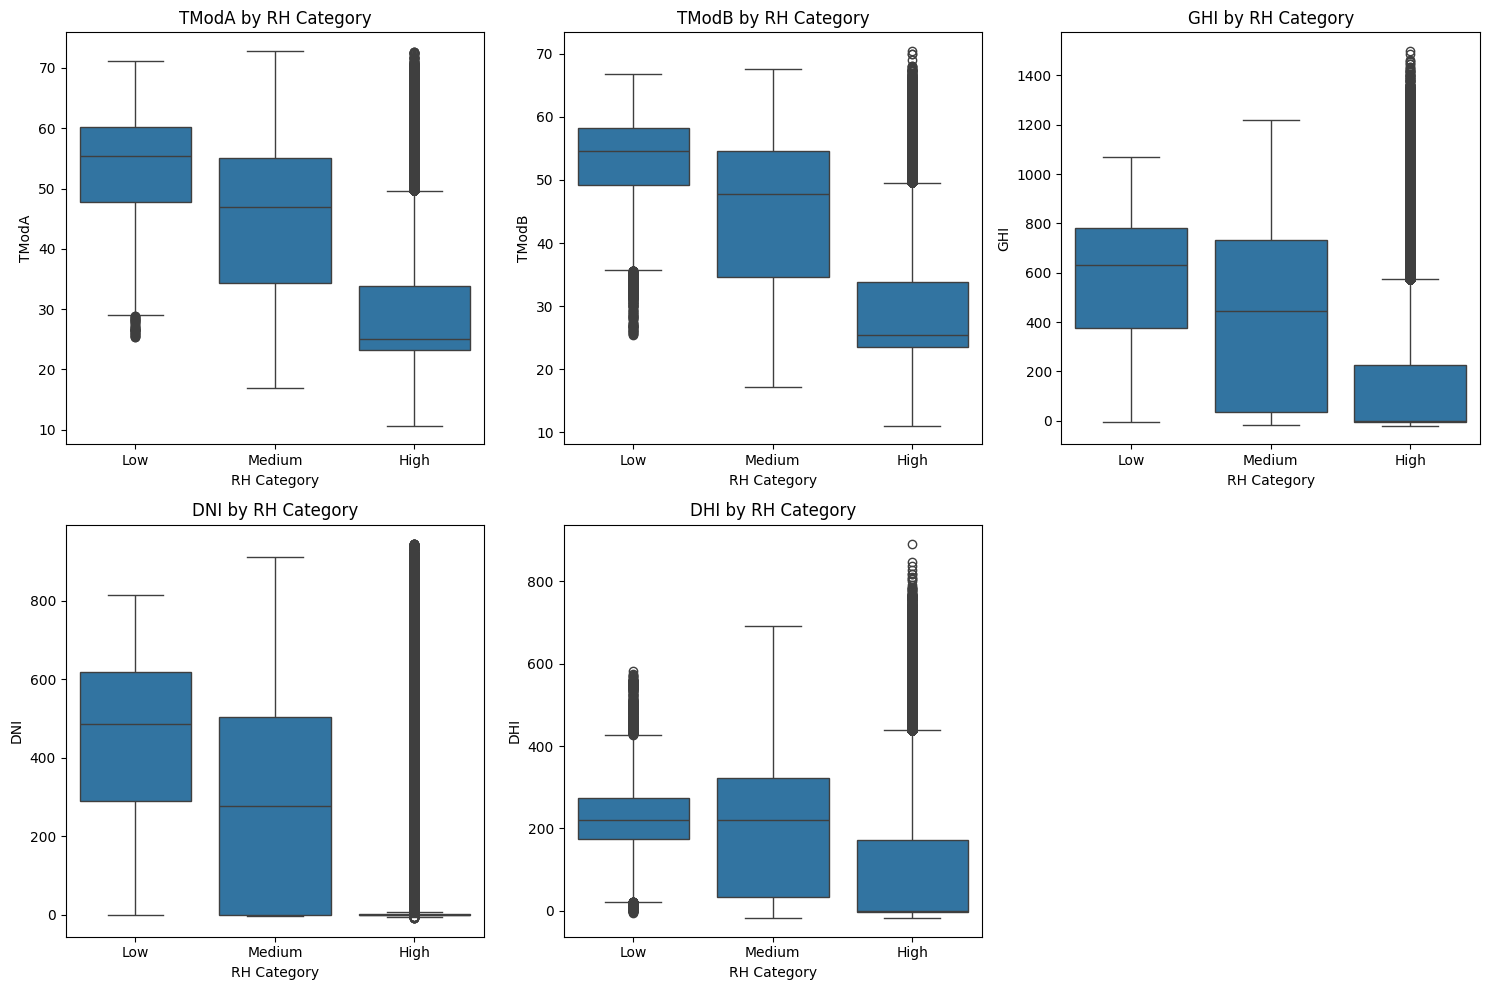

In [70]:
plot_boxplot_rh_categories(sl_df)

#### **Togo Solar Farm**

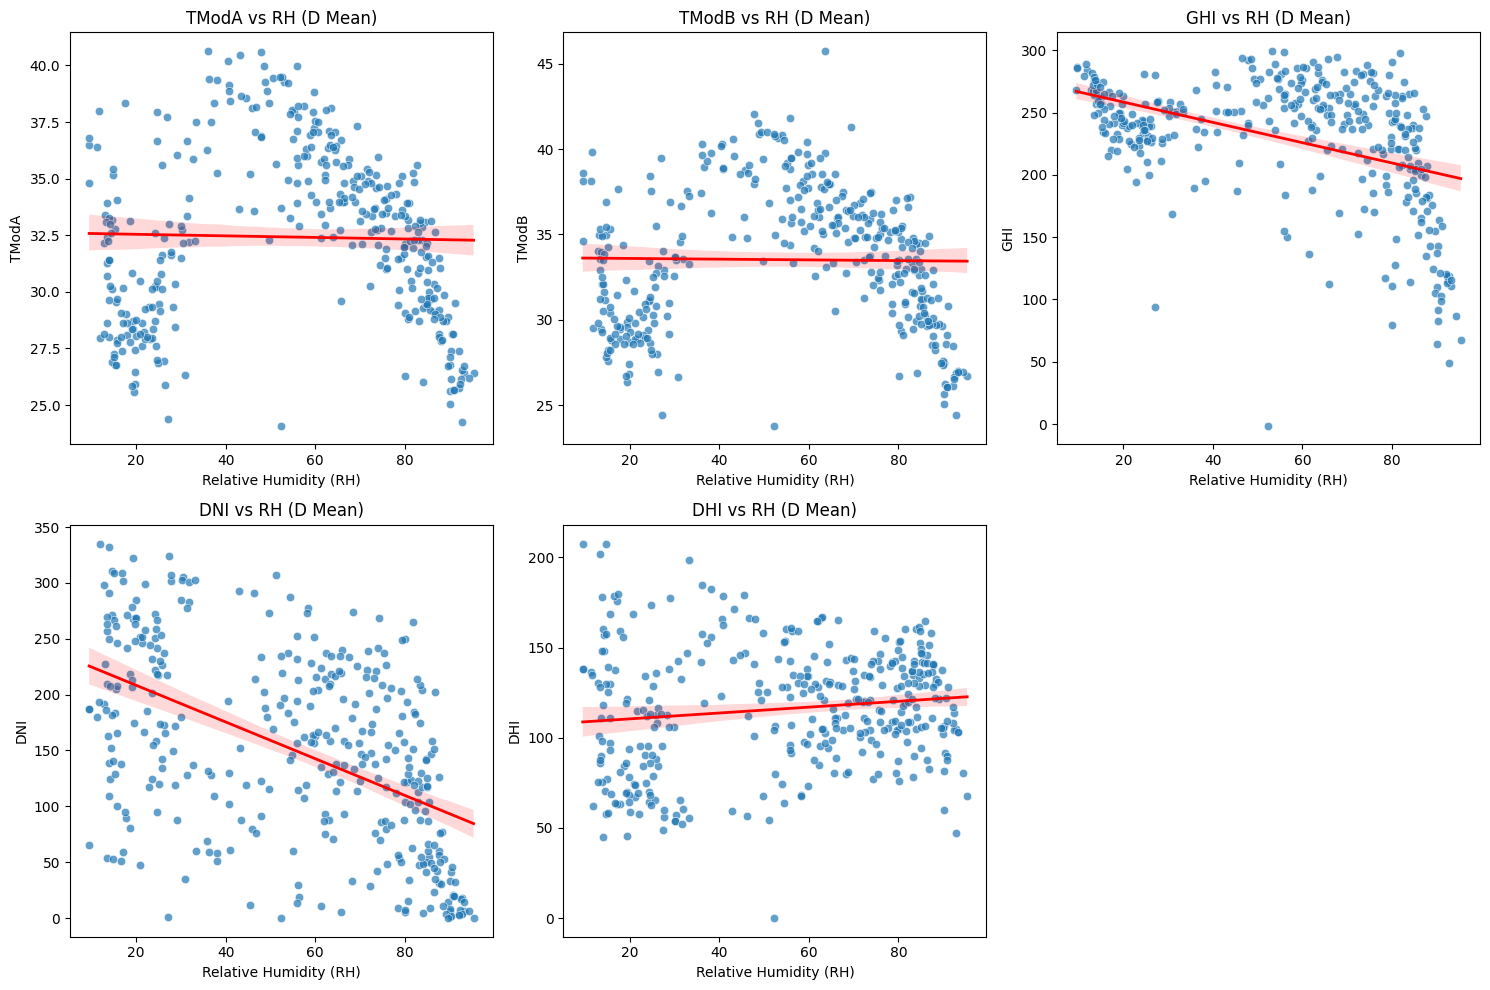

In [71]:
analyze_rh_impact(tg_df)

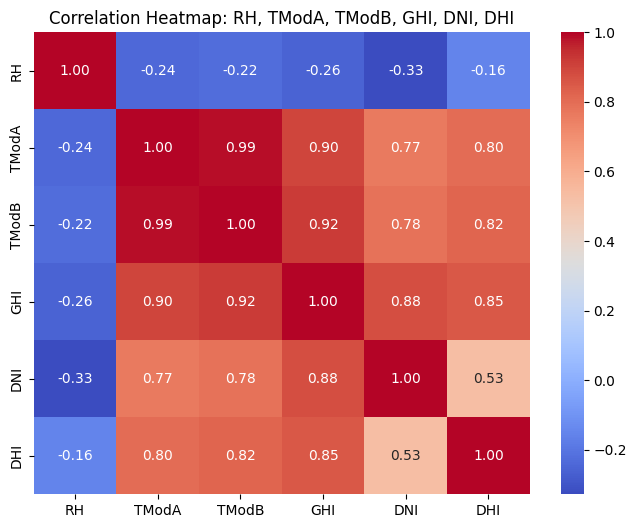

In [72]:
plot_correlation_heatmap(tg_df, temp_cols)

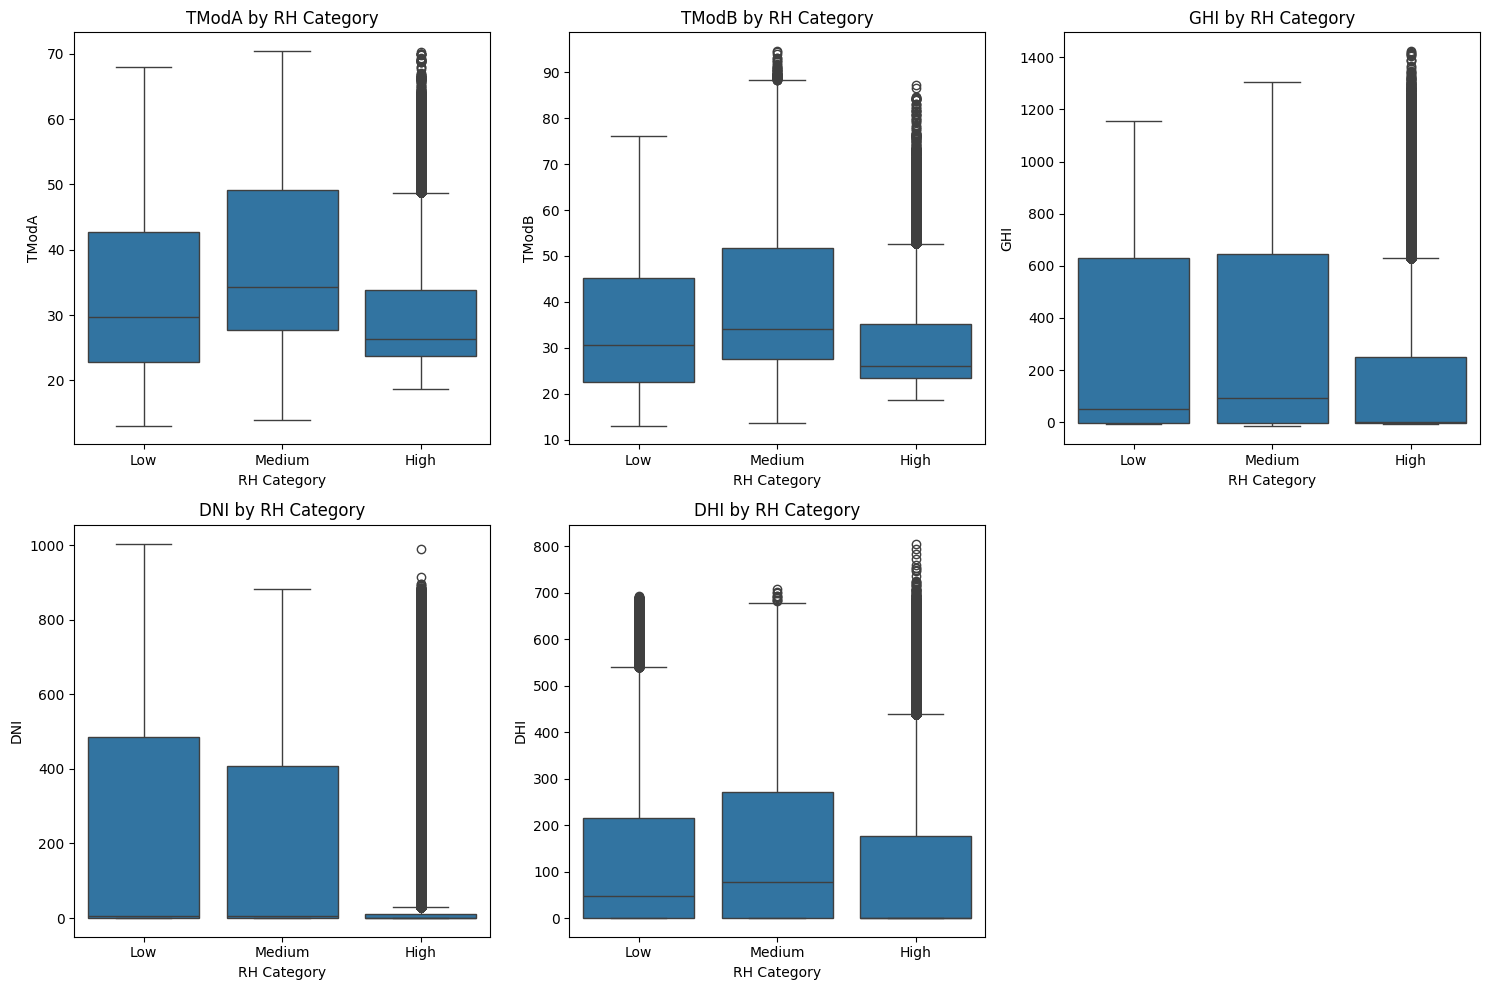

In [73]:
plot_boxplot_rh_categories(tg_df)

### **Histograms**

**Global Horizontal Irradiance (`GHI`)**: The majority of values are concentrated below 200, indicating limited high irradiance levels. A long tail suggests occasional higher irradiance, possibly due to specific atmospheric or seasonal conditions.

**Direct Normal Irradiance (`DNI`)**: A sharp peak at lower values, with most readings below 100, points to relatively low direct sunlight exposure, likely influenced by cloud cover or other atmospheric factors.

**Diffuse Horizontal Irradiance (`DHI`)**: Similar to GHI and DNI, DHI is skewed towards lower values, showing limited diffuse radiation. This complements the overall solar radiation profile.

**Wind Speed (`WS`)**: Exhibits a steep decline after 2–5 units, suggesting predominantly calm or moderate wind conditions with infrequent high-speed winds. This aligns with expected patterns in areas with stable atmospheric conditions.

**Temperature (`TModA` and `TModB`)**: Both exhibit a near-normal distribution, centered around 30°C, with variations indicating slight differences in sensor calibration or localized effects.

#### **Benin Solar Farm**

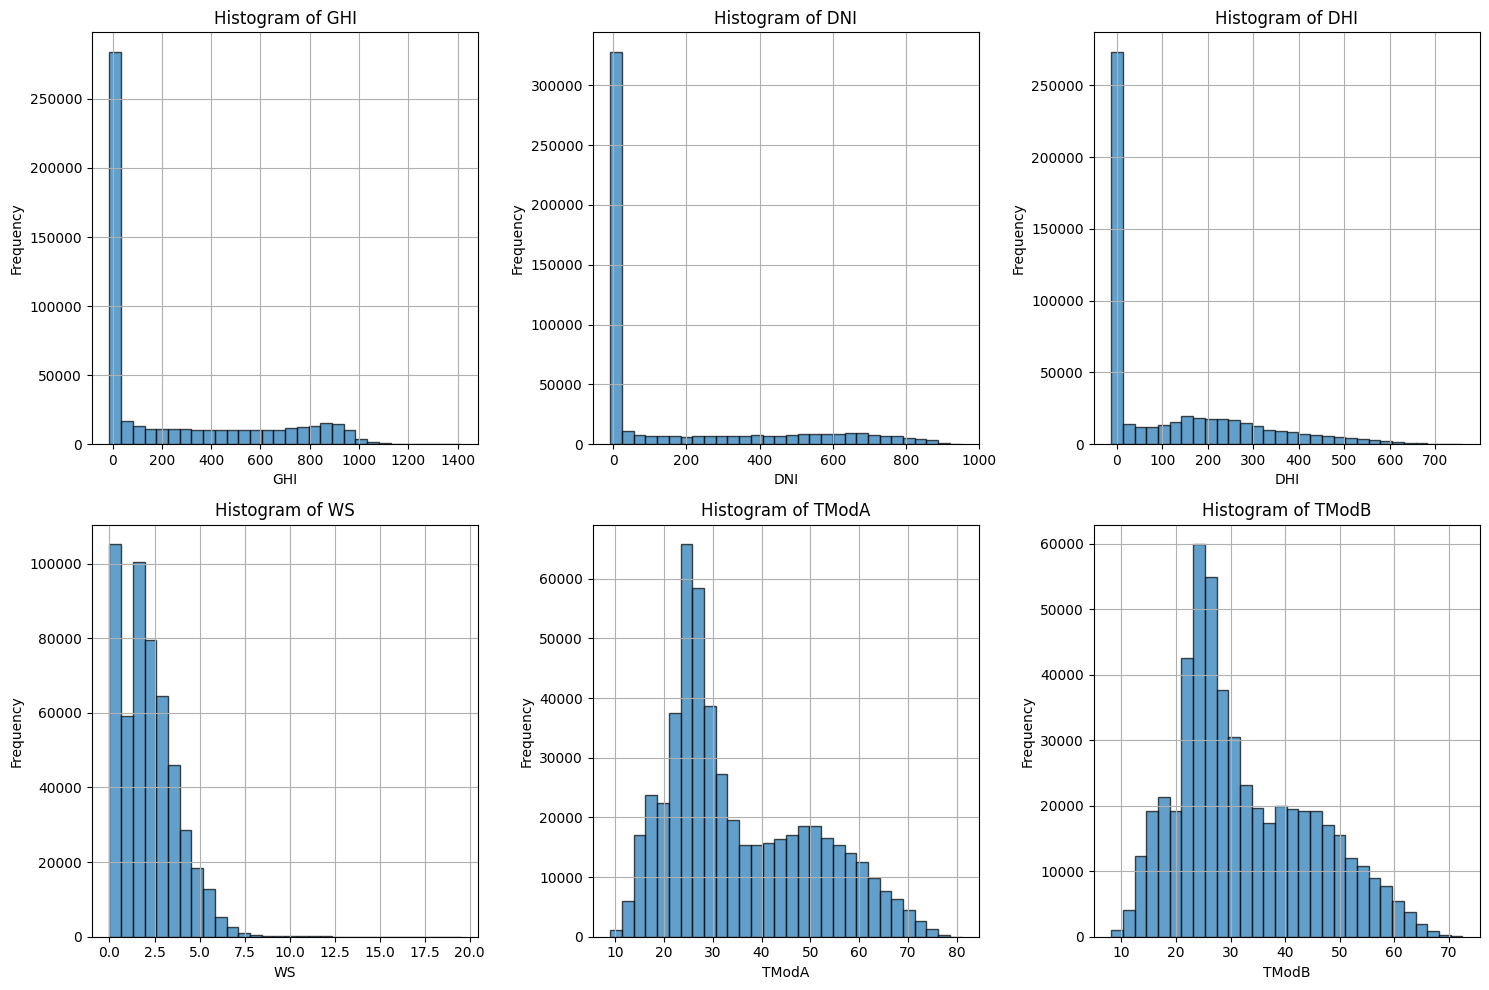

In [75]:
plot_histograms(bn_df, variables=["GHI", "DNI", "DHI", "WS", "TModA", "TModB"])

#### **Sierra Leone Solar Farm**

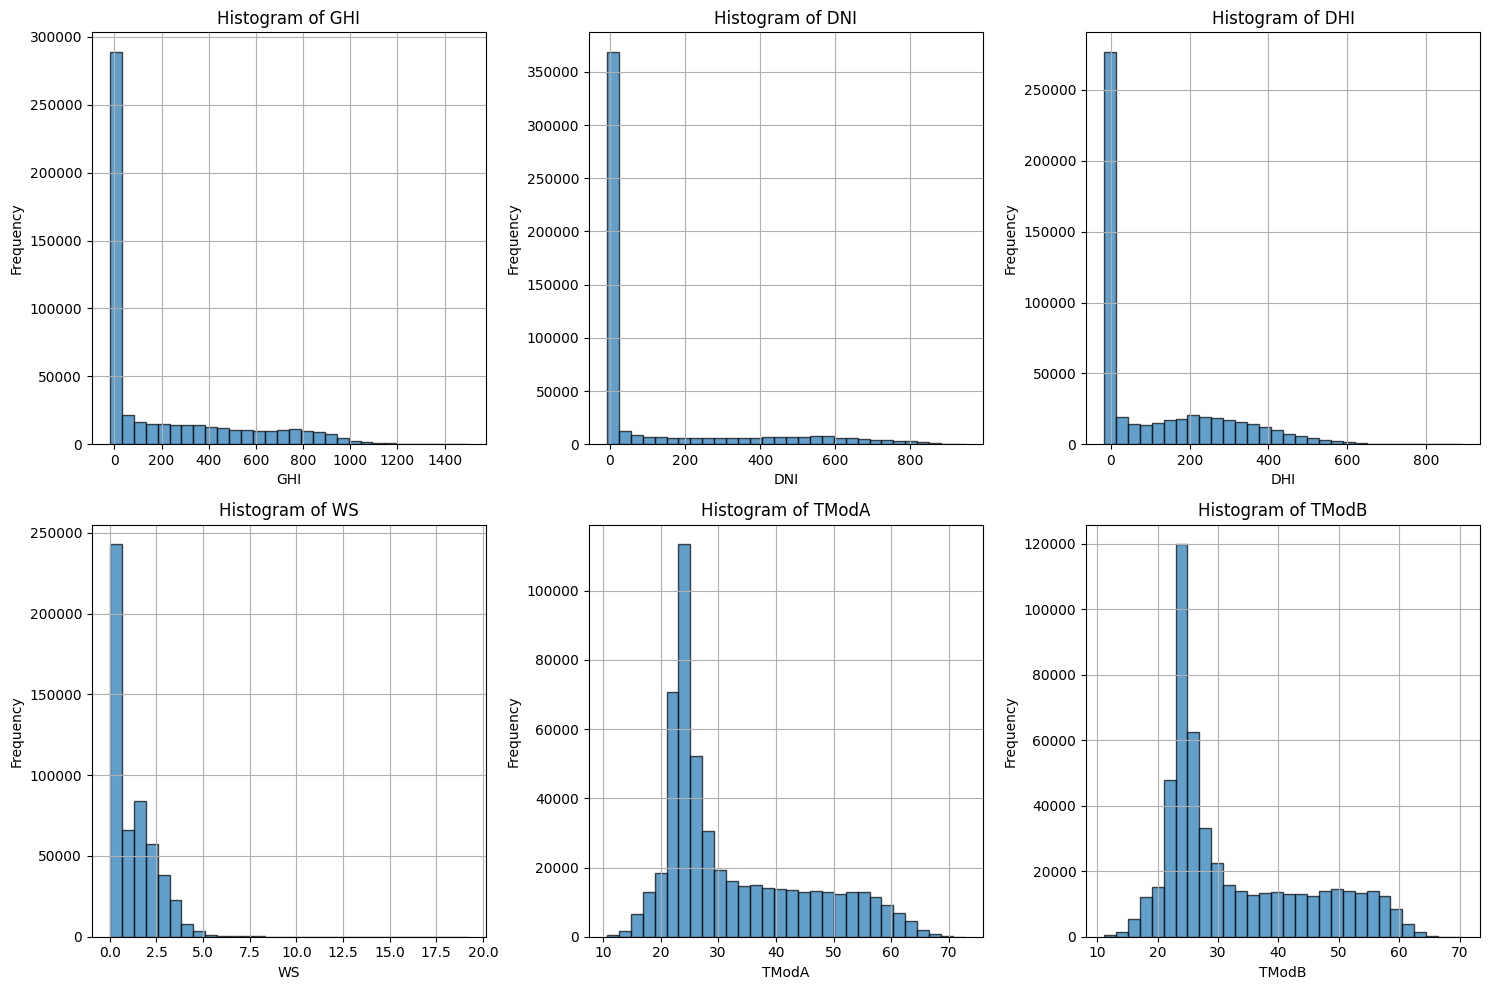

In [76]:
plot_histograms(sl_df, variables=["GHI", "DNI", "DHI", "WS", "TModA", "TModB"])

#### **Togo Solar Farm**

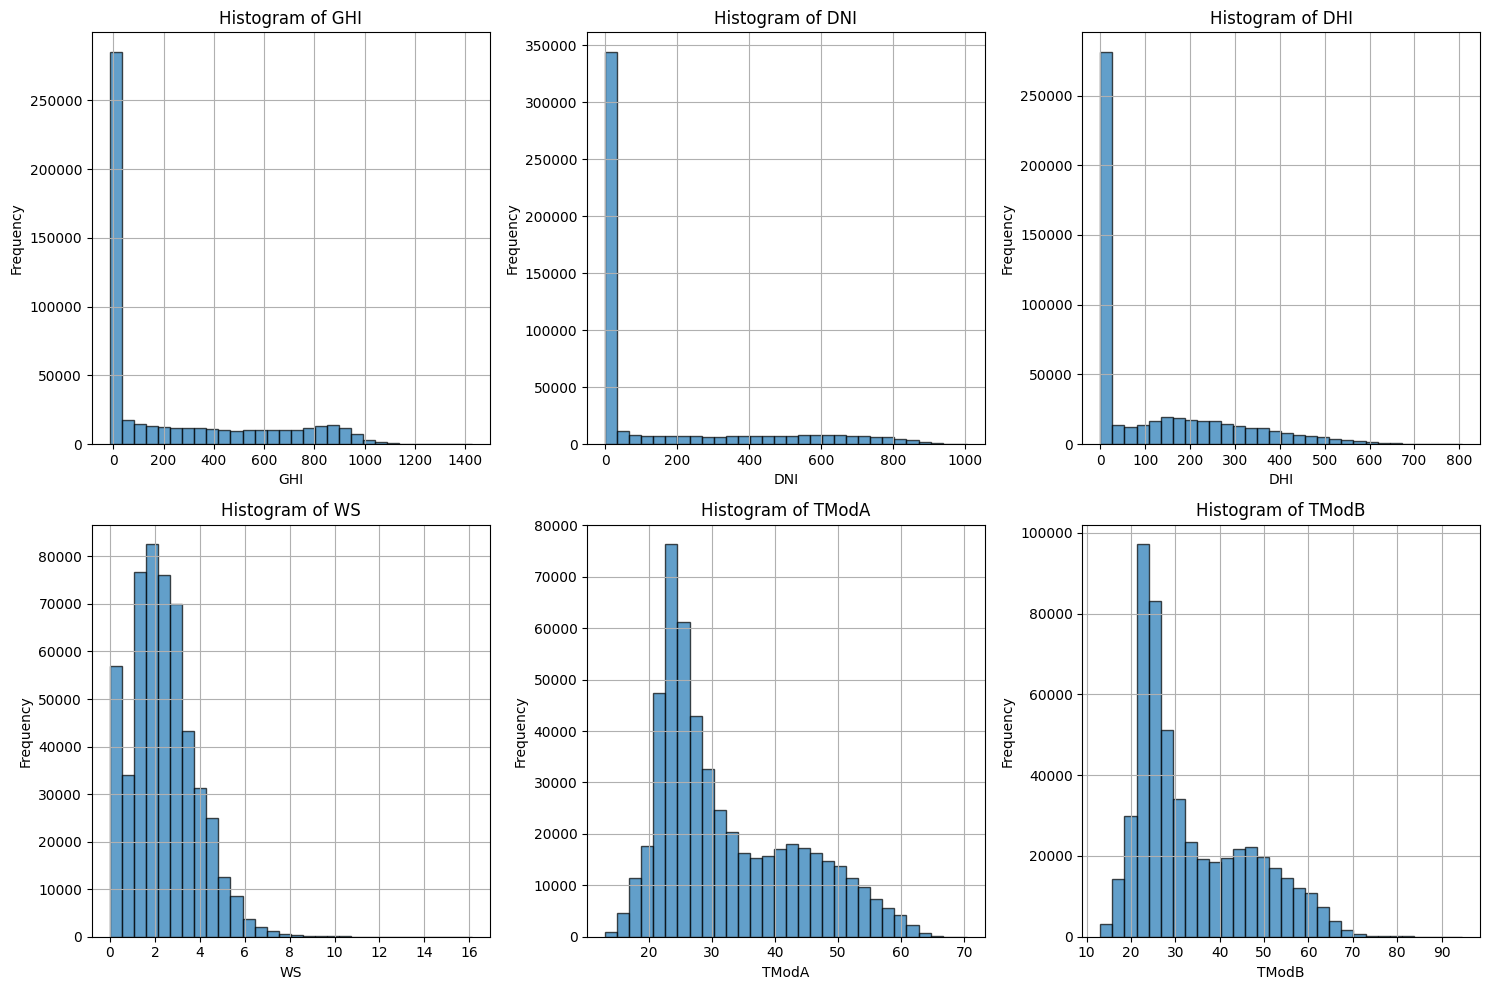

In [77]:
plot_histograms(tg_df, variables=["GHI", "DNI", "DHI", "WS", "TModA", "TModB"])

### **Z-Score Analysis**



#### **Benin Solar Farm**

In [81]:
calculate_z_scores(bn_df, corr_columns)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...   ...   ...   ...   ...  ...     ...   
2022-08-08 23:56:00 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
2022-08-08 23:57:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
2022-08-08 23:58:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
2022-08-08 23:59:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
2022-08-09 00:00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

                     WSstdev  ...  ModA_zscore  ModA_flagged  ModB_zscore  \
Timestamp                     ...                                           
2021-08-09 00:01:00      0.1  ...    -0.723748         False    -0.723087   
2021-08-09 00:02:00      0.0  ...    -0.723748         False    -0.723087   
2021-08-09 00:03:00      0.5  ...    -0.723748         False    -0.723087   
2021-08-09 00:04:00      0.4  ...    -0.723748         False    -0.723087   
2021-08-09 00:05:00      0.3  ...    -0.723748         False    -0.723087   
...                      ...  ...          ...           ...          ...   
2022-08-08 23:56:00      0.5  ...    -0.723748         False    -0.723087   
2022-08-08 23:57:00      0.4  ...    -0.723748         False    -0.723087   
2022-08-08 23:58:00      0.5  ...    -0.723748         False    -0.723087   
2022-08-08 23:59:00      0.5  ...    -0.723748         False    -0.723087   
2022-08-09 00:00:00      0.3  ...    -0.723748         False    -0.723087   

                     ModB_flagged  WS_zscore  WS_flagged  WSgust_zscore  \
Timestamp                                                                 
2021-08-09 00:01:00         False  -1.322830       False      -1.187310   
2021-08-09 00:02:00         False  -1.322830       False      -1.384440   
2021-08-09 00:03:00         False  -1.135735       False      -0.842333   
2021-08-09 00:04:00         False  -1.198100       False      -1.039463   
2021-08-09 00:05:00         False  -1.260465       False      -1.039463   
...                           ...        ...         ...            ...   
2022-08-08 23:56:00         False  -1.135735       False      -0.842333   
2022-08-08 23:57:00         False  -1.198100       False      -1.039463   
2022-08-08 23:58:00         False  -0.948641       False      -0.842333   
2022-08-08 23:59:00         False  -0.761546       False      -0.743768   
2022-08-09 00:00:00         False  -0.574451       False      -0.595921   

                     WSgust_flagged Tamb_zscore Tamb_flagged  
Timestamp                                                     
2021-08-09 00:01:00           False   -0.334163        False  
2021-08-09 00:02:00           False   -0.334163        False  
2021-08-09 00:03:00           False   -0.334163        False  
2021-08-09 00:04:00           False   -0.334163        False  
2021-08-09 00:05:00           False   -0.334163        False  
...                             ...         ...          ...  
2022-08-08 23:56:00           False   -0.857432        False  
2022-08-08 23:57:00           False   -0.857432        False  
2022-08-08 23:58:00           False   -0.857432        False  
2022-08-08 23:59:00           False   -0.857432        False  
2022-08-09 00:00:00           False   -0.857432        False  

[525600 rows x 36 columns]

#### **Sierra Leone Solar Farm**

In [83]:
calculate_z_scores(sl_df, corr_columns)

GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
Timestamp                                                                  
2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...   ...   ...   ...    ...  ...     ...   
2022-10-29 23:56:00 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
2022-10-29 23:57:00 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
2022-10-29 23:58:00 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
2022-10-29 23:59:00 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
2022-10-30 00:00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

                     WSstdev  ...  ModA_zscore  ModA_flagged  ModB_zscore  \
Timestamp                     ...                                           
2021-10-30 00:01:00      0.0  ...    -0.686757         False    -0.685781   
2021-10-30 00:02:00      0.0  ...    -0.686757         False    -0.685781   
2021-10-30 00:03:00      0.0  ...    -0.686757         False    -0.685781   
2021-10-30 00:04:00      0.0  ...    -0.686757         False    -0.685781   
2021-10-30 00:05:00      0.0  ...    -0.686757         False    -0.685781   
...                      ...  ...          ...           ...          ...   
2022-10-29 23:56:00      0.0  ...    -0.686757         False    -0.685781   
2022-10-29 23:57:00      0.0  ...    -0.686757         False    -0.685781   
2022-10-29 23:58:00      0.0  ...    -0.686757         False    -0.685781   
2022-10-29 23:59:00      0.0  ...    -0.686757         False    -0.685781   
2022-10-30 00:00:00      0.0  ...    -0.686757         False    -0.685781   

                     ModB_flagged  WS_zscore  WS_flagged  WSgust_zscore  \
Timestamp                                                                 
2021-10-30 00:01:00         False  -0.924845       False      -1.046104   
2021-10-30 00:02:00         False  -0.924845       False      -1.046104   
2021-10-30 00:03:00         False  -0.924845       False      -1.046104   
2021-10-30 00:04:00         False  -0.924845       False      -1.046104   
2021-10-30 00:05:00         False  -0.924845       False      -1.046104   
...                           ...        ...         ...            ...   
2022-10-29 23:56:00         False  -0.924845       False      -1.046104   
2022-10-29 23:57:00         False  -0.924845       False      -1.046104   
2022-10-29 23:58:00         False  -0.924845       False      -1.046104   
2022-10-29 23:59:00         False  -0.924845       False      -1.046104   
2022-10-30 00:00:00         False  -0.924845       False      -1.046104   

                     WSgust_flagged Tamb_zscore Tamb_flagged  
Timestamp                                                     
2021-10-30 00:01:00           False   -1.004726        False  
2021-10-30 00:02:00           False   -1.004726        False  
2021-10-30 00:03:00           False   -1.004726        False  
2021-10-30 00:04:00           False   -1.004726        False  
2021-10-30 00:05:00           False   -1.004726        False  
...                             ...         ...          ...  
2022-10-29 23:56:00           False   -0.527302        False  
2022-10-29 23:57:00           False   -0.527302        False  
2022-10-29 23:58:00           False   -0.527302        False  
2022-10-29 23:59:00           False   -0.550037        False  
2022-10-30 00:00:00           False   -0.550037        False  

[525600 rows x 36 columns]

#### **Togo Solar Farm**

In [84]:
calculate_z_scores(tg_df, corr_columns)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...   ...   ...   ...   ...  ...     ...   
2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

                     WSstdev  ...  ModA_zscore  ModA_flagged  ModB_zscore  \
Timestamp                     ...                                           
2021-10-25 00:01:00      0.4  ...    -0.712609         False    -0.713041   
2021-10-25 00:02:00      0.4  ...    -0.712609         False    -0.713041   
2021-10-25 00:03:00      0.3  ...    -0.712609         False    -0.713041   
2021-10-25 00:04:00      0.3  ...    -0.712609         False    -0.713041   
2021-10-25 00:05:00      0.4  ...    -0.712609         False    -0.713041   
...                      ...  ...          ...           ...          ...   
2022-10-24 23:56:00      0.0  ...    -0.712609         False    -0.713041   
2022-10-24 23:57:00      0.0  ...    -0.712609         False    -0.713041   
2022-10-24 23:58:00      0.0  ...    -0.712609         False    -0.713041   
2022-10-24 23:59:00      0.0  ...    -0.712609         False    -0.713041   
2022-10-25 00:00:00      0.0  ...    -0.712609         False    -0.713041   

                     ModB_flagged  WS_zscore  WS_flagged  WSgust_zscore  \
Timestamp                                                                 
2021-10-25 00:01:00         False  -1.003709       False      -1.131164   
2021-10-25 00:02:00         False  -0.866973       False      -0.865569   
2021-10-25 00:03:00         False  -0.798605       False      -0.971807   
2021-10-25 00:04:00         False  -0.798605       False      -0.865569   
2021-10-25 00:05:00         False  -0.730237       False      -0.865569   
...                           ...        ...         ...            ...   
2022-10-24 23:56:00         False  -1.619024       False      -1.715473   
2022-10-24 23:57:00         False  -1.619024       False      -1.715473   
2022-10-24 23:58:00         False  -1.619024       False      -1.715473   
2022-10-24 23:59:00         False  -1.619024       False      -1.715473   
2022-10-25 00:00:00         False  -1.619024       False      -1.715473   

                     WSgust_flagged Tamb_zscore Tamb_flagged  
Timestamp                                                     
2021-10-25 00:01:00           False   -0.620381        False  
2021-10-25 00:02:00           False   -0.620381        False  
2021-10-25 00:03:00           False   -0.620381        False  
2021-10-25 00:04:00           False   -0.620381        False  
2021-10-25 00:05:00           False   -0.620381        False  
...                             ...         ...          ...  
2022-10-24 23:56:00           False   -0.536313        False  
2022-10-24 23:57:00           False   -0.515296        False  
2022-10-24 23:58:00           False   -0.515296        False  
2022-10-24 23:59:00           False   -0.494278        False  
2022-10-25 00:00:00           False   -0.494278        False  

[525600 rows x 36 columns]

### **Bubble charts**

**GHI vs Tamb**: A positive relationship is observed; higher temperatures correlate with increased GHI levels.

**Wind Speed (WS)**: Larger bubble sizes (high wind speed) seem scattered throughout but tend to appear more in moderate GHI and Tamb regions.

**Relative Humidity (RH)**: Color gradients show that higher RH (yellow) predominantly exists in low GHI and moderate Tamb regions.


#### **Benin Solar Farm**

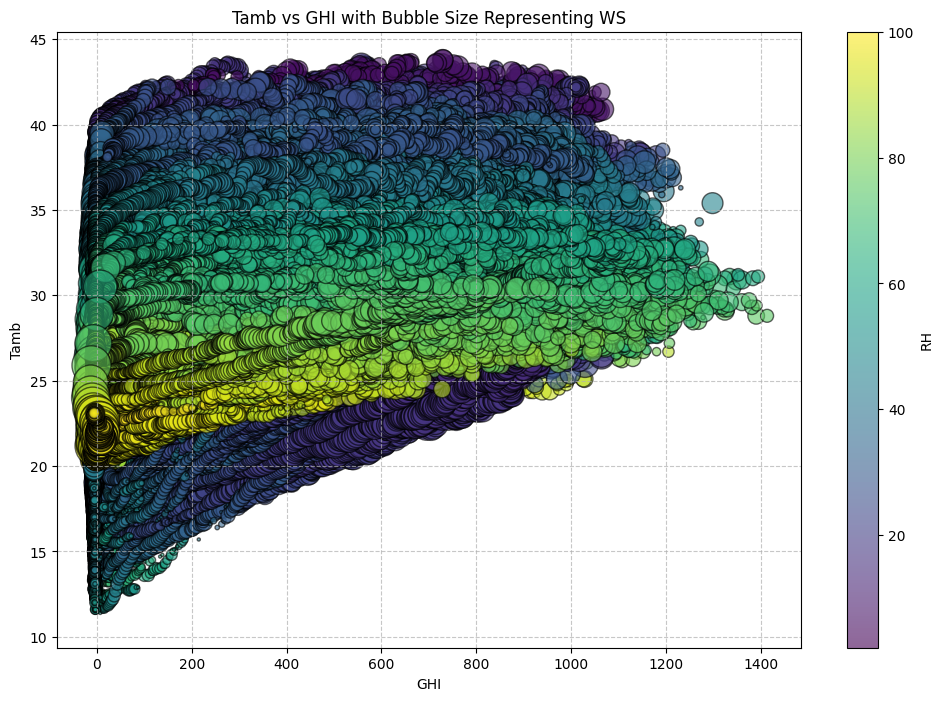

In [85]:
plot_bubble_chart(
    data=bn_df,
    x_var="GHI",
    y_var="Tamb",
    size_var="WS",
    color_var="RH",
    figsize=(12, 8),
)

#### **Sierra Leone Solar Farm**

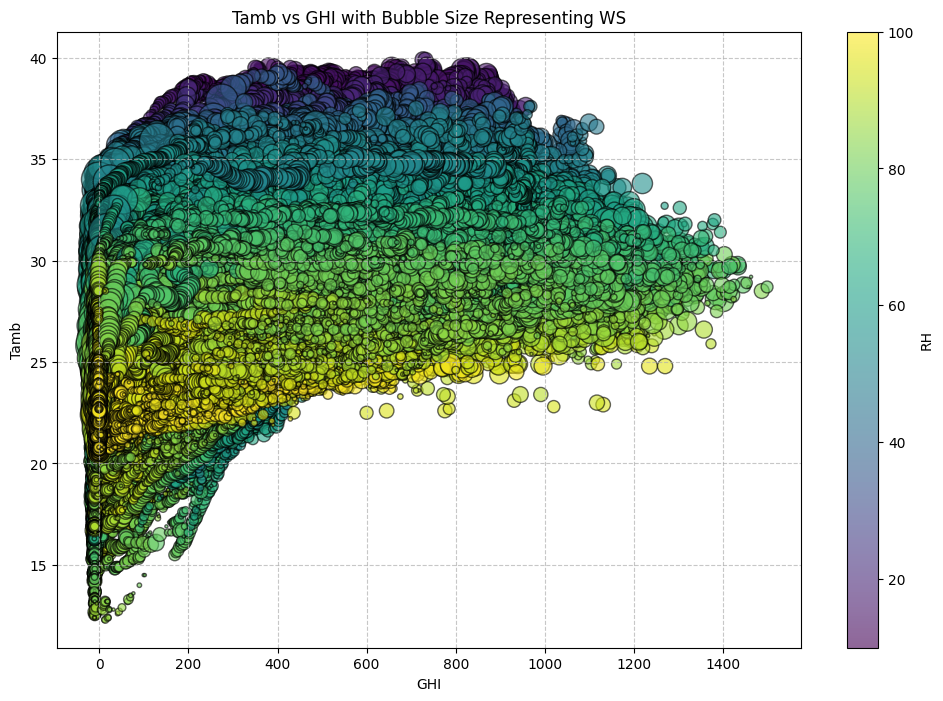

In [86]:
plot_bubble_chart(
    data=sl_df,
    x_var="GHI",
    y_var="Tamb",
    size_var="WS",
    color_var="RH",
    figsize=(12, 8),
)

#### **Togo Solar Farm**

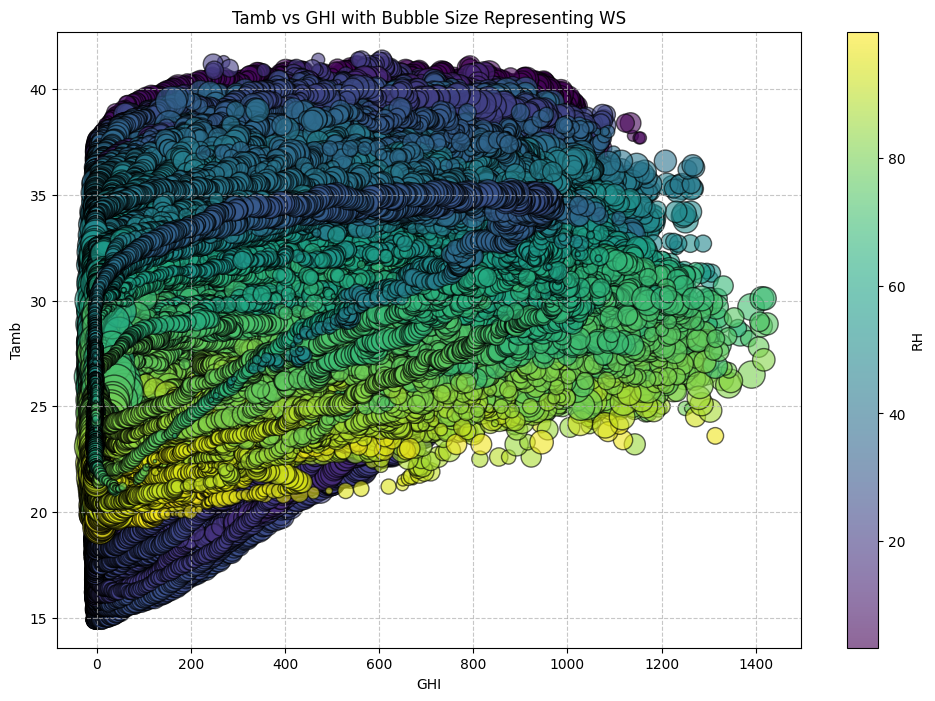

In [87]:
plot_bubble_chart(
    data=tg_df,
    x_var="GHI",
    y_var="Tamb",
    size_var="WS",
    color_var="RH",
    figsize=(12, 8),
)

### **Data Cleaning**